# Data & Things (RUC F2023)

## Hand-in Exercises for Exam

* This is a template for your exercise solutions. Each solution may use multiple cells. 

* Do your best to make your code clean and clear, e.g., by using comments and markdowns.

* Remeber to fill in the information of all your group members in the following cell.

## Group Members:
* [Rasmus Kjær Nielsen, 68910, rkjaern@ruc.dk]
* [Daniel Vesntmar Norén, 65246, dvn@ruc.dk]
* [Jakob Høfsten, 68889, jahoho@ruc.dk]
* [Mangus Rude Nielsen, 68950, mruden@ruc.dk]

## 0. Loading of common modules or initialization of other common things, if any

In [1]:
import pandas as pd
import numpy as np
import scratch.deep_learning as dl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import mglearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

<Figure size 640x480 with 0 Axes>

## 1. EDA and data cleaning (Lecture 2 & 5)

Make an Exploratory Data Analysis (EDA) and data cleaning of the “titanic_survival_data.csv” dataset from Lectures 5 and 6, including dealing with outliers and missing values.

In [2]:
titanic = pd.read_csv("data/titanic_survival_data.csv")

In [3]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


In [4]:
age_average = titanic['Age'].mean()
titanic['Age'].fillna(int(age_average), inplace=True)
age_average

29.679271708683473

In [5]:
titanic.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
5,0,3,male,29.0,0,0,84.583,Q
6,0,1,male,54.0,0,0,518.625,S
7,0,3,male,2.0,3,1,21.075,S


In [6]:
titanic["Sex"] = titanic.Sex.replace({'male':0, 'female':1})

In [7]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,868.000000
mean,0.383838,2.308642,0.352413,29.544332,0.523008,0.381594,91.288425
std,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,159.991488
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,10.500000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,27.825000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,78.958000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,910.792000


We tried to find outliers from the passenger class and the fare price. Looking at the figure below we see that a few people in the 3rd class paid a lot in regards to thier class.

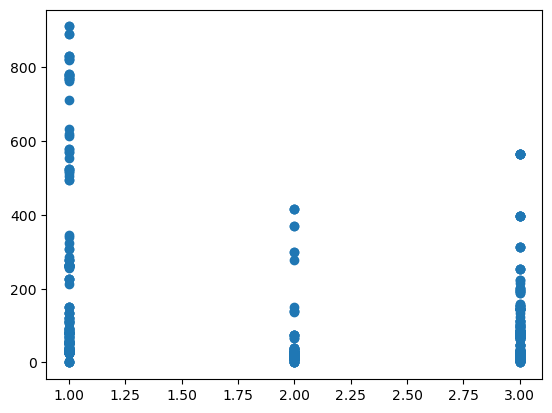

In [8]:
x = titanic['Pclass']
y = titanic['Fare']
plt.scatter(x,y)

We then choose to remove the outliers.

In [9]:
titanic = titanic.drop(titanic[(titanic['Pclass'] == 3) & (titanic['Fare'] > 450)].index)

In [10]:
titanic.dropna(subset=['Embarked'], inplace = True)

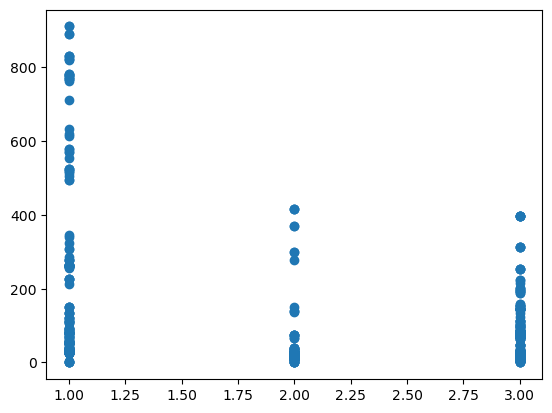

In [11]:
x = titanic['Pclass']
y = titanic['Fare']
plt.scatter(x,y)

## 2. Classification (Lecture 3 & 4)

Combine the exercise from Lecture 3 with exercise 2 from Lecture 4 into one, and construct some classification models to predict if a passenger would survive or not in the Titanic dataset. 

* a) You should have (1) decision tree, (2) random forest, and (3) KNN. You may also vary the configuration of each model type.
* b) You should do necessary data preprocessing (e.g., missing value fill-in, and data scaling if needed for a classifier). 
* c) You should also do cross-validation of your models.
* d) Plot the ROC with AUC for each model you implement.


### Exercises with KNN on Titanic dataset

Now we have handled the data, and filled in the missing values. So now we can do the KNN

In [12]:
titanic = pd.read_csv("data/titanic.csv")

Data preprocessing

In [13]:
titanic["Sex"] = titanic.Sex.replace({'male':0, 'female':1})
age_average = titanic['Age'].mean()
titanic['Age'].fillna(int(age_average), inplace=True)
titanic.dropna(subset=['Embarked'], inplace = True)

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Feature selection

In [15]:
features = titanic.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'])
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [16]:
X = titanic[features]
y = titanic['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Decision tree

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree = dtree.fit(X_train, y_train)

In [20]:
y_pred = dtree.predict(X_test)

In [21]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))

Accuracy: 0.8052434456928839
Recall: 0.7722772277227723
Precision: 0.7289719626168224


Random forrest


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(forest, X, y, cv=kf)
print("The scores from the different splits", scores)
print("The mean is the K-fold scores is: ", scores.mean())

The scores from the different splits [0.79213483 0.81460674 0.82022472 0.85955056 0.79096045]
The mean is the K-fold scores is:  0.8154954611819971


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
forest.fit(X_train, y_train)
y_pred = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

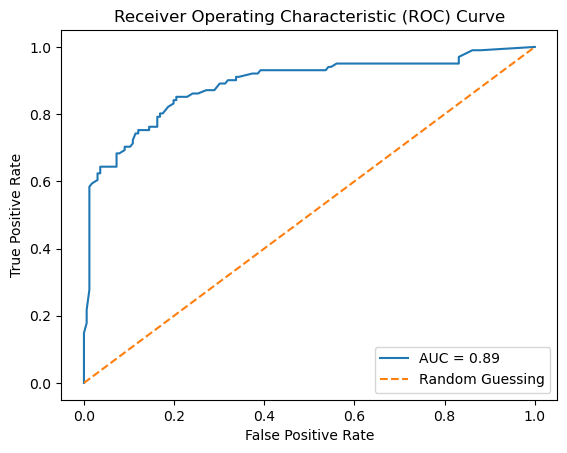

In [24]:
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [25]:
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

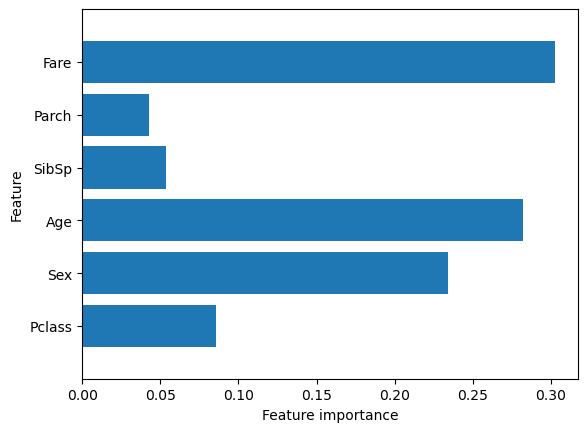

In [26]:
plot_feature_importances(forest, features)

This tells us that the features with most importance towards predicting survival is Fare, Sex and Age.

In [27]:
X = titanic[['Age', 'Fare', 'Sex']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
from sklearn.neighbors import KNeighborsClassifier


def knnRunner(X, y):
    # We create a 2-D array to store all accuracy values
    accuracy_data1 = []
    
    for training_percent in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-training_percent, random_state=1)

        # We crate a 1-D array to store all accuracy values on this split batch
        accuracy_row = []
        
        for k in range(2, 11):
            # Model intializing
            knn = KNeighborsClassifier(n_neighbors=k)

            # Training (very light compared to an eager learner)
            knn.fit(X_train, y_train)

            # Validation/Test
            y_pred = knn.predict(X_test)

            print("KNN with training_percent={}, k={}:\r".format(training_percent, k))
            
            # Get the accuracy from metrics
            accuracy = metrics.accuracy_score(y_test, y_pred)
            print("Accuracy: {}\r\n".format(accuracy))

            accuracy_row.append(accuracy)
            
        accuracy_data1.append(accuracy_row)
    
    return accuracy_data1

Here we see the data without scaling

In [30]:
accuracies_no_scaling = knnRunner(X, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.6779026217228464

KNN with training_percent=0.7, k=3:
Accuracy: 0.6928838951310862

KNN with training_percent=0.7, k=4:
Accuracy: 0.6966292134831461

KNN with training_percent=0.7, k=5:
Accuracy: 0.6741573033707865

KNN with training_percent=0.7, k=6:
Accuracy: 0.6816479400749064

KNN with training_percent=0.7, k=7:
Accuracy: 0.700374531835206

KNN with training_percent=0.7, k=8:
Accuracy: 0.7340823970037453

KNN with training_percent=0.7, k=9:
Accuracy: 0.6816479400749064

KNN with training_percent=0.7, k=10:
Accuracy: 0.7153558052434457

KNN with training_percent=0.8, k=2:
Accuracy: 0.6797752808988764

KNN with training_percent=0.8, k=3:
Accuracy: 0.7247191011235955

KNN with training_percent=0.8, k=4:
Accuracy: 0.6966292134831461

KNN with training_percent=0.8, k=5:
Accuracy: 0.702247191011236

KNN with training_percent=0.8, k=6:
Accuracy: 0.6853932584269663

KNN with training_percent=0.8, k=7:
Accuracy: 0.6966292134831461

KNN with tr

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Now with standardscaler

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.describe()

,Age,Fare,Sex
count,8.890000e+02,8.890000e+02,8.890000e+02
mean,1.026550e-16,1.092115e-16,3.601668e-16
std,1.000563e+00,1.000563e+00,1.000563e+00
min,-2.244306e+00,-6.462044e-01,-7.353420e-01
25%,-5.796430e-01,-4.872378e-01,-7.353420e-01
50%,-3.966896e-02,-3.551972e-01,-7.353420e-01
75%,4.231659e-01,-2.207954e-02,1.359911e+00
max,3.894428e+00,9.668551e+00,1.359911e+00


In [32]:
accuracies_standard_scaling = knnRunner(X_scaled, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.7640449438202247

KNN with training_percent=0.7, k=3:
Accuracy: 0.7640449438202247

KNN with training_percent=0.7, k=4:
Accuracy: 0.7752808988764045

KNN with training_percent=0.7, k=5:
Accuracy: 0.7790262172284644

KNN with training_percent=0.7, k=6:
Accuracy: 0.8052434456928839

KNN with training_percent=0.7, k=7:
Accuracy: 0.7940074906367042

KNN with training_percent=0.7, k=8:
Accuracy: 0.8014981273408239

KNN with training_percent=0.7, k=9:
Accuracy: 0.797752808988764

KNN with training_percent=0.7, k=10:
Accuracy: 0.8014981273408239

KNN with training_percent=0.8, k=2:
Accuracy: 0.7640449438202247

KNN with training_percent=0.8, k=3:
Accuracy: 0.7696629213483146

KNN with training_percent=0.8, k=4:
Accuracy: 0.7640449438202247

KNN with training_percent=0.8, k=5:
Accuracy: 0.7640449438202247

KNN with training_percent=0.8, k=6:
Accuracy: 0.7471910112359551

KNN with training_percent=0.8, k=7:
Accuracy: 0.7752808988764045

KNN with t

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Now with min-max

In [33]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [34]:
accuracies_minmax_scaling = knnRunner(X_scaled_mm, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.7790262172284644

KNN with training_percent=0.7, k=3:
Accuracy: 0.7453183520599251

KNN with training_percent=0.7, k=4:
Accuracy: 0.7565543071161048

KNN with training_percent=0.7, k=5:
Accuracy: 0.7602996254681648

KNN with training_percent=0.7, k=6:
Accuracy: 0.7677902621722846

KNN with training_percent=0.7, k=7:
Accuracy: 0.7790262172284644

KNN with training_percent=0.7, k=8:
Accuracy: 0.7790262172284644

KNN with training_percent=0.7, k=9:
Accuracy: 0.7827715355805244

KNN with training_percent=0.7, k=10:
Accuracy: 0.797752808988764

KNN with training_percent=0.8, k=2:
Accuracy: 0.7640449438202247

KNN with training_percent=0.8, k=3:
Accuracy: 0.7584269662921348

KNN with training_percent=0.8, k=4:
Accuracy: 0.7584269662921348

KNN with training_percent=0.8, k=5:
Accuracy: 0.7696629213483146

KNN with training_percent=0.8, k=6:
Accuracy: 0.7415730337078652

KNN with training_percent=0.8, k=7:
Accuracy: 0.7471910112359551

KNN with t

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Now visualized in a graph

In [35]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_no_scaling = pd.DataFrame(accuracies_no_scaling, columns=columns, index=index).transpose()
df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()
df_minmax_scaling = pd.DataFrame(accuracies_minmax_scaling, columns=columns, index=index).transpose()

In [36]:
def plotAccuracy(col):
    import matplotlib.pyplot as plt

    plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
    plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
    plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')

    plt.xlabel('K')
    plt.ylabel('KNN accuracy')
    plt.title('Effect of data scaling on KNN for training data ratio={}'.format(col))

    plt.legend()

C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


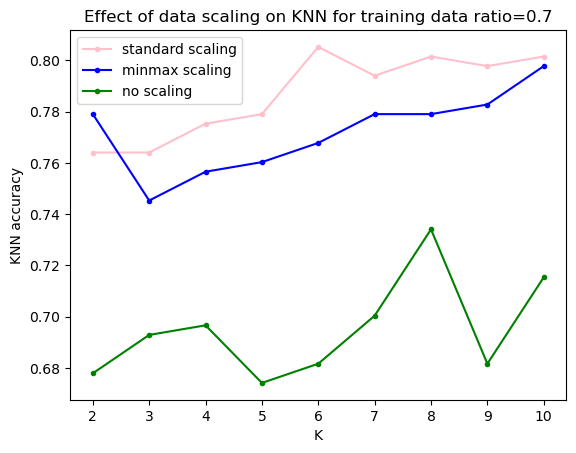

In [37]:
plotAccuracy('0.7')

C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


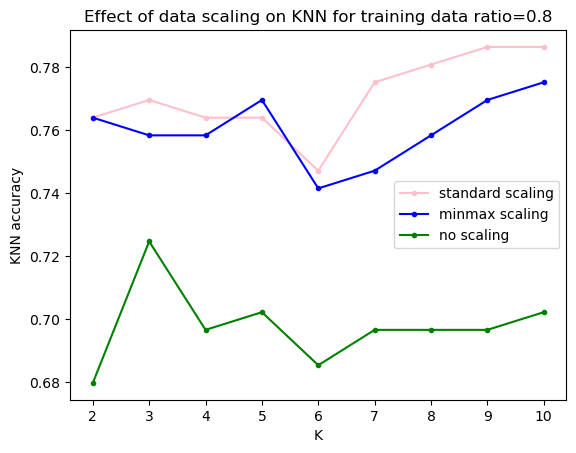

In [38]:
plotAccuracy('0.8')

C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


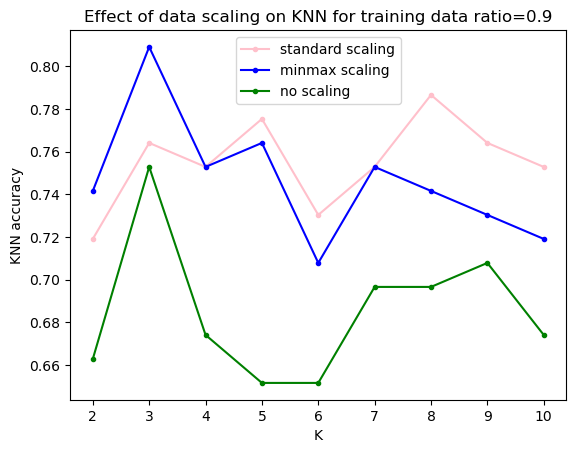

In [39]:
plotAccuracy('0.9')

In [40]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()

C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2424605476.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling['0.9'], 'b.-', label = '0.9', color='green')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2424605476.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling['0.8'], 'b.-', label = '0.8', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_18764\2424605476.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling['0.7'], 'b.-', label = '0.7', color='pink')


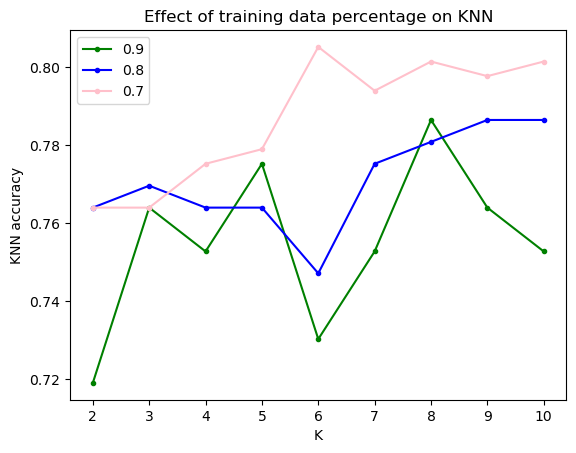

In [41]:
import matplotlib.pyplot as plt

plt.plot(df_standard_scaling.index, df_standard_scaling['0.9'], 'b.-', label = '0.9', color='green')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.8'], 'b.-', label = '0.8', color='blue')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.7'], 'b.-', label = '0.7', color='pink')

plt.xlabel('K')
plt.ylabel('KNN accuracy')
plt.title('Effect of training data percentage on KNN')

plt.legend()

## 3. Regression (Lecture 6)

Train a multiple linear regression, a random forest model, and an AdaBoost model on the “boston_housing_data.csv” dataset from Lectures 5 and 6 and remember to do train-test split as well as other necessary pre-processing dataset.

### Multiple Linear Regression (MLR)

In this section we use MLR to predict medv

In [42]:
data = pd.read_csv("data/boston_housing_data.csv")

In [43]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


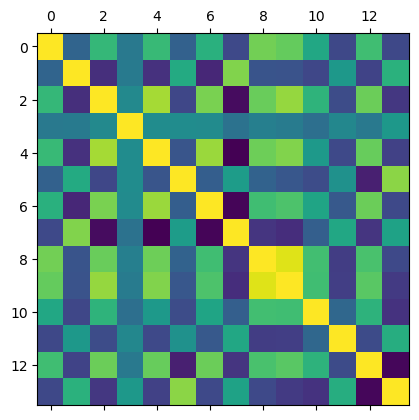

In [45]:
plt.matshow(data.corr())
plt.show()

In [46]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg

LinearRegression()

In [47]:
y = data["medv"]

In [48]:
reg.fit(data.drop(columns="medv"), y)
reg

LinearRegression()

In [49]:
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
y_pred = reg.predict(data.drop(columns="medv"))

In [52]:
print("MSE:", mean_squared_error(data['medv'], y_pred))
print("RMSE:", np.sqrt(mean_squared_error(data["medv"], y_pred)))
print("Regression Score:", r2_score(data['medv'], y_pred))

MSE: 21.894831181729202
RMSE: 4.679191295697281
Regression Score: 0.7406426641094095


We can tell from the scores that this is not the best performing model in this perticular dataset/usecase.

We should strive for lower scores on the MSE, RMSE and higher on the R2 score

### Random Forest

In this section we use Random Forest Regressor to predict medv

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
reg_rf = RandomForestRegressor()

In [55]:
reg_rf.fit(data.drop(columns="medv"), data["medv"])

RandomForestRegressor()

In [56]:
y_pred_rf = reg_rf.predict(data.drop(columns="medv"))

In [57]:
print("RMSE:", np.sqrt(mean_squared_error(data["medv"], y_pred_rf)))
print("Regression Score:", r2_score(data['medv'], y_pred_rf))

RMSE: 1.234109901512769
Regression Score: 0.9819588337304872


We can tell from the evaluation values that this performs signifigantly better than multiple linear regression

MSE is not used in this model because it usually doesn't perform with a value of signifigance. 

### AdaBoost

In this section we use AdaBoostRegressor to predict medv

In [58]:
from sklearn.ensemble import AdaBoostRegressor

In [59]:
reg_ab = AdaBoostRegressor()

In [60]:
reg_ab.fit(data.drop(columns="medv"), data["medv"])

AdaBoostRegressor()

In [61]:
y_pred_ab = reg_ab.predict(data.drop(columns="medv"))

In [62]:
print("RMSE:", np.sqrt(mean_squared_error(data["medv"], y_pred_ab)))
print("Regression Score:", r2_score(data['medv'], y_pred_ab))

RMSE: 2.8005821099607324
Regression Score: 0.9070919048647559


We can tell from the evaluation values that this performs signifigantly better than multiple linear regression but worse than random forest.

Our best performing model is the random forest

## 4. Clustering (Lecture 7 & 8)

Exercise 2 (both 2.1 and 2.2) from Lecture 7 and exercise 1 from Lecture 8.

In [63]:
data = pd.read_csv('data/Ch5_bike_station_locations.csv')

Now we want to show the data head and tail

In [64]:
data.head()

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


In [65]:
data.tail()

,latitude,longitude
239,38.965620,-77.060719
240,38.880730,-76.993533
241,38.924690,-76.978702
242,38.869303,-76.968034
243,38.934918,-76.965717


In [66]:
data.shape

(244, 2)

Firstly we can plot this, to show that there is clusters showing

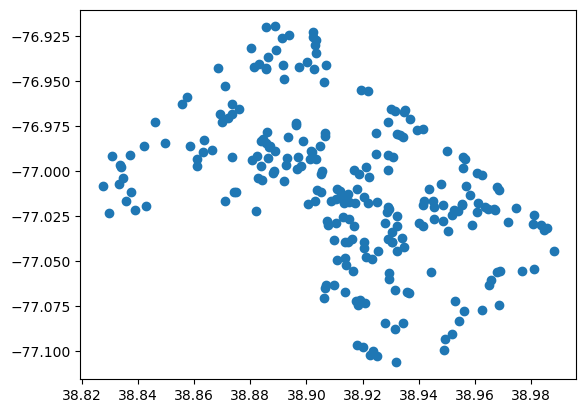

In [67]:
x = data['latitude']
y = data['longitude']
plt.scatter(x,y)
plt.show()

Next we do feature selection.

In [68]:
X = data[['latitude','longitude']]

Firstly we want to try and make KMeans clustering.

In [69]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

Now, we have our clusters. We can then visualize them, first we k=2.

Text(0.5, 1.0, 'k=2')

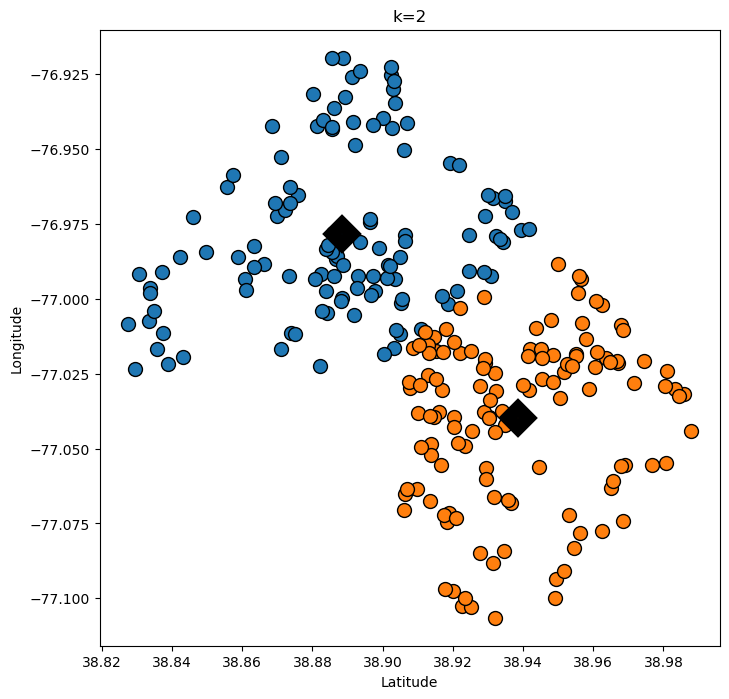

In [70]:
import mglearn
import matplotlib.pyplot as plt

list_clusters = range(0, 2)
#[0, 1, 2]

plt.figure(figsize=(8, 8))

# To plot all data points in their respective cluster form
mglearn.discrete_scatter(X['latitude'], X['longitude'], kmeans.labels_, markers='o')

# To plot the cluster centers
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('k=2')

k=3.

Text(0.5, 1.0, 'k=3')

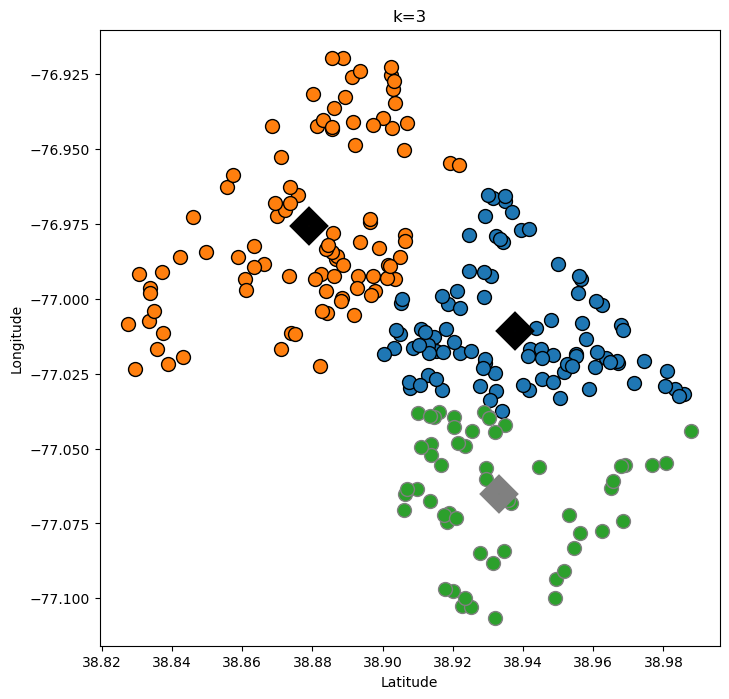

In [71]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

list_clusters = range(0, 3)
#[0, 1, 2]

plt.figure(figsize=(8, 8))

# To plot all data points in their respective cluster form
mglearn.discrete_scatter(X['latitude'], X['longitude'], kmeans.labels_, markers='o')

# To plot the cluster centers
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('k=3')

k=4.

Text(0.5, 1.0, 'k=4')

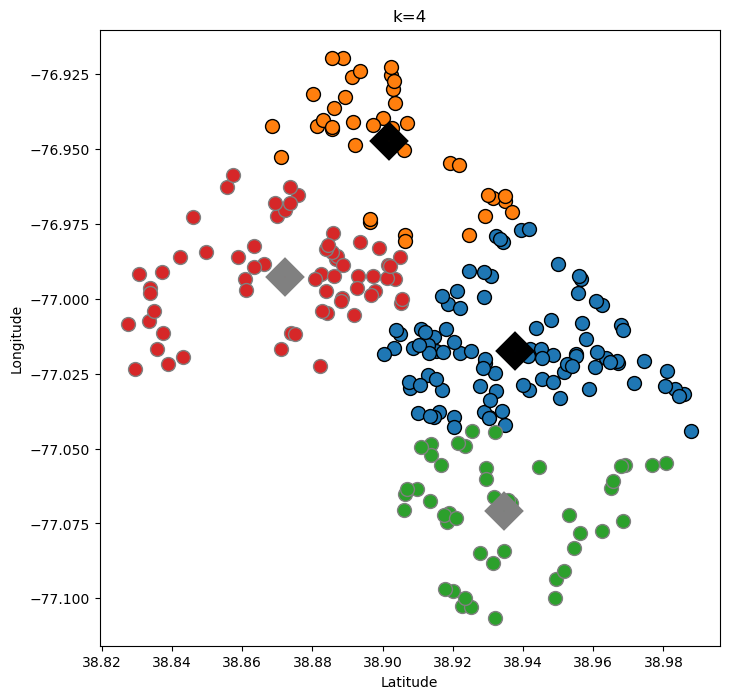

In [72]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

list_clusters = range(0, 4)
#[0, 1, 2]

plt.figure(figsize=(8, 8))

# To plot all data points in their respective cluster form
mglearn.discrete_scatter(X['latitude'], X['longitude'], kmeans.labels_, markers='o')

# To plot the cluster centers
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('k=4')

k=5.

Text(0.5, 1.0, 'k=5')

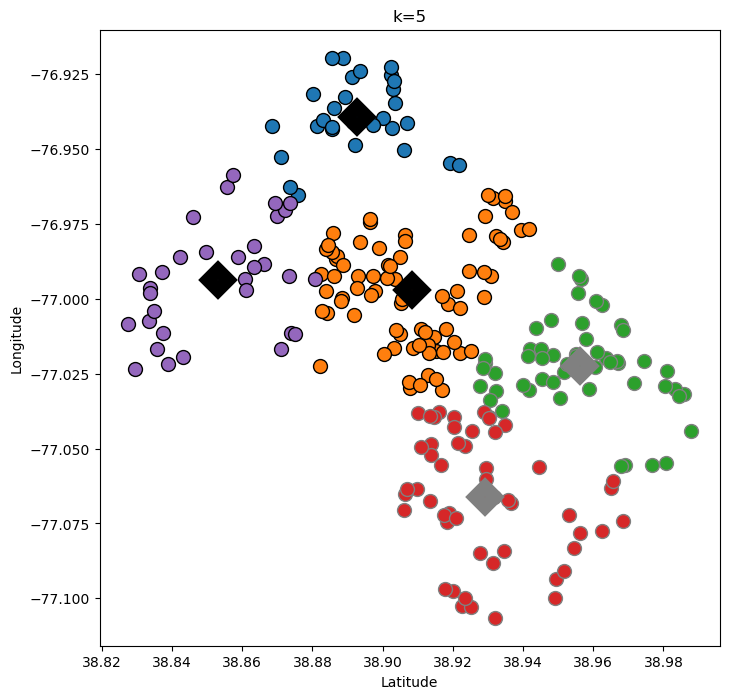

In [73]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

list_clusters = range(0, 5)
#[0, 1, 2]

plt.figure(figsize=(8, 8))

# To plot all data points in their respective cluster form
mglearn.discrete_scatter(X['latitude'], X['longitude'], kmeans.labels_, markers='o')

# To plot the cluster centers
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('k=5')

This is a lot of plots with different k-values, instead of plotting all of these by themselves. We can find the optimal amount of clusters, by using the elbow method.

In [74]:
errors = []
K = range(1, 16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    errors.append(kmeanModel.inertia_)

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


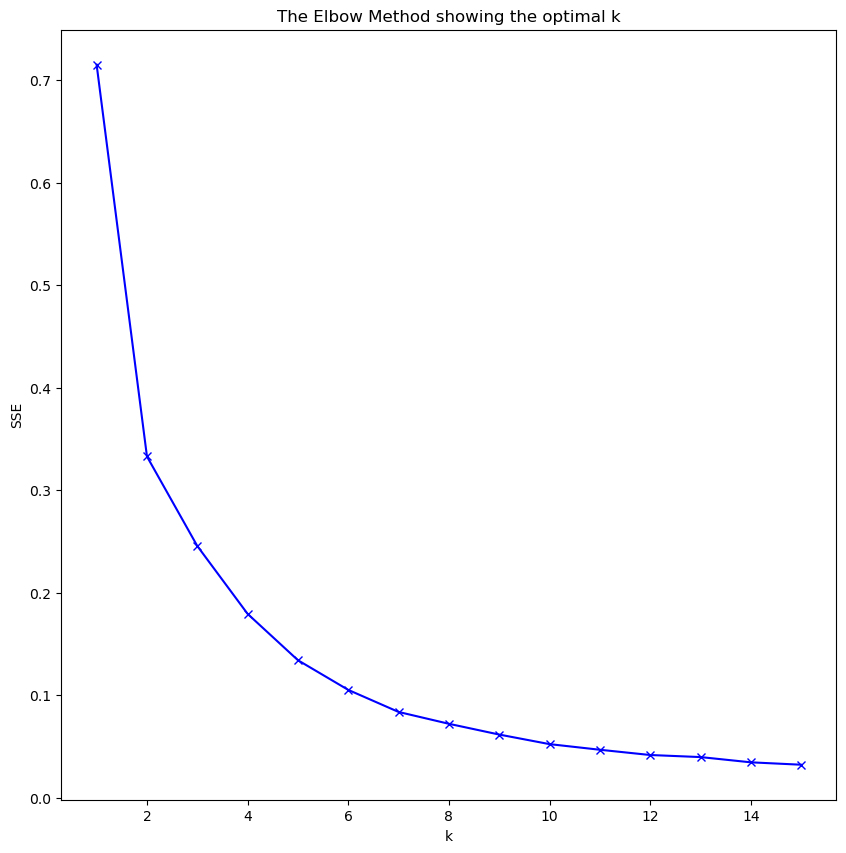

In [75]:
plt.figure(figsize=(10, 10))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [76]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 0.38226918533418497
K=3: 0.0873481149918029
K=4: 0.06625937288281644
K=5: 0.04522633896976355
K=6: 0.028973602620909283
K=7: 0.021519817763569607
K=8: 0.011555605153687615
K=9: 0.010510163530227726
K=10: 0.009335986777165989
K=11: 0.0054878630127049854
K=12: 0.005123233237294675
K=13: 0.002020559728602933
K=14: 0.0051230057498959924
K=15: 0.0023372151716207074


We can see from our elbow method, that the optimal amount of clusters, is around 5.

We can also try this with agglomerative clustering.

In [77]:

# Apply the agglomerative clustering algorithm, using 5 clusters
agg = AgglomerativeClustering(n_clusters=5)
assignment = agg.fit_predict(X)

We now have our clusters, we can now visualize.

In [78]:
def aggClustering(n):
    # Apply the agglomerative clustering algorithm, using n clusters
    agg = AgglomerativeClustering(n_clusters=n)
    assignment = agg.fit_predict(X)

    plt.figure(figsize=(8, 6))
    # Plot the clusters
    mglearn.discrete_scatter(X.values[:, 0], X.values[:, 1], assignment)

    cluster_list = []
    for i in range(1, n+1):
        cluster_list.append('Cluster {0}'.format(i))
    plt.legend(cluster_list, loc="best")

    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.title("Agglomerative clustering with {0} clusters".format(n))
    plt.show()

We can now visualize from 10 to 1 cluster:

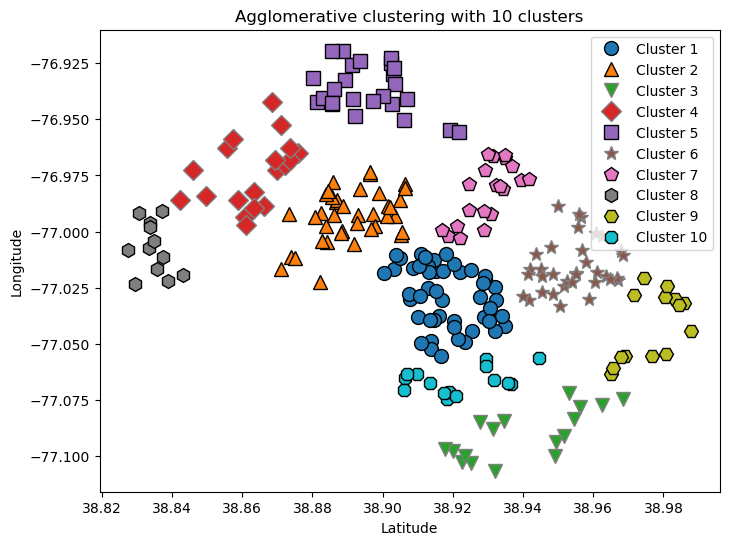

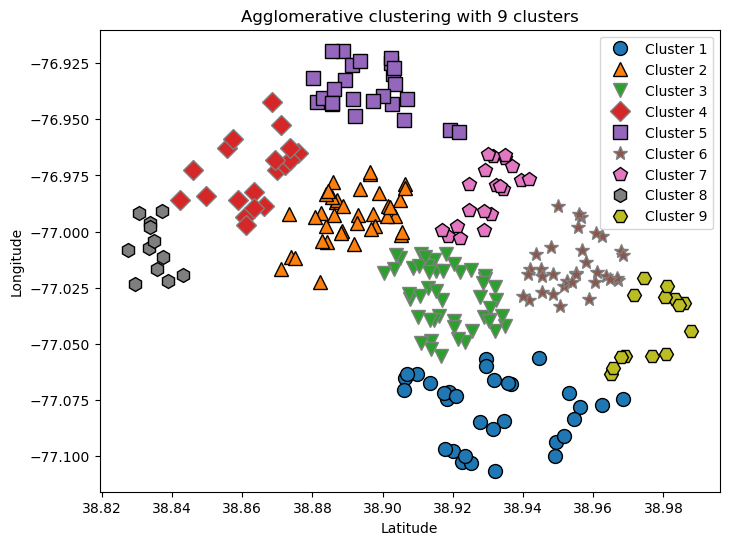

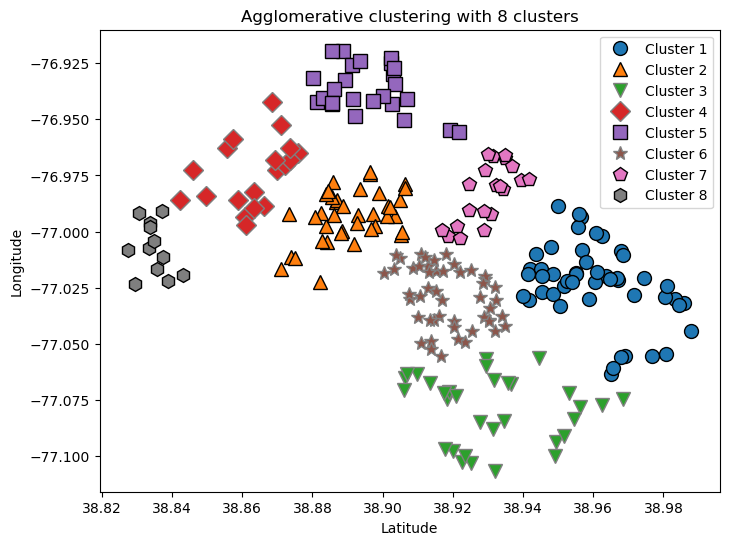

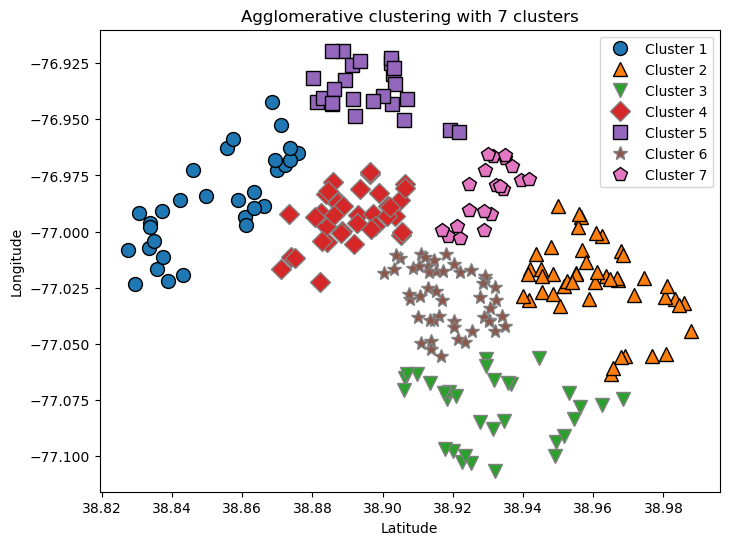

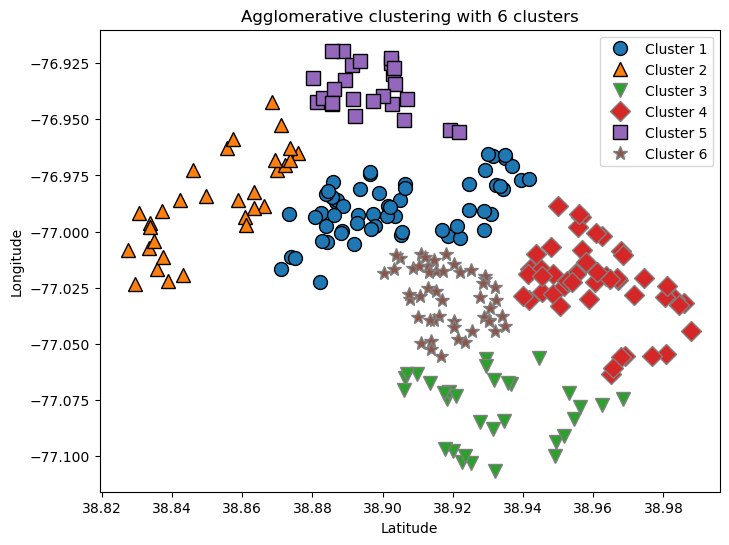

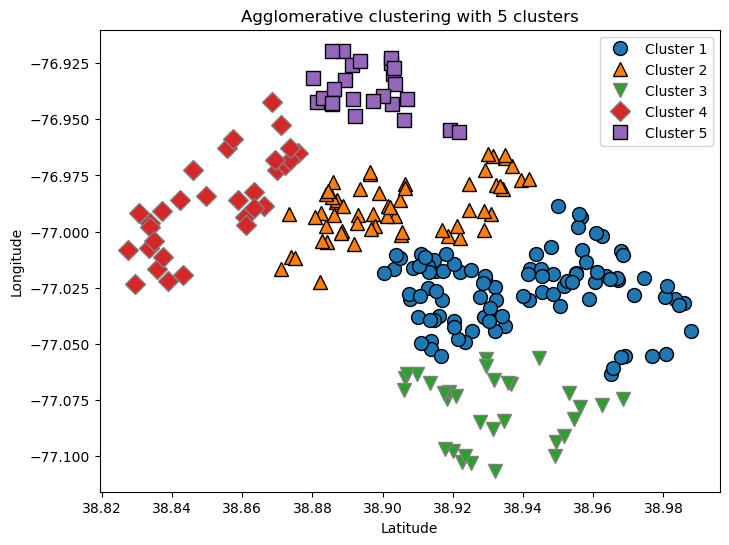

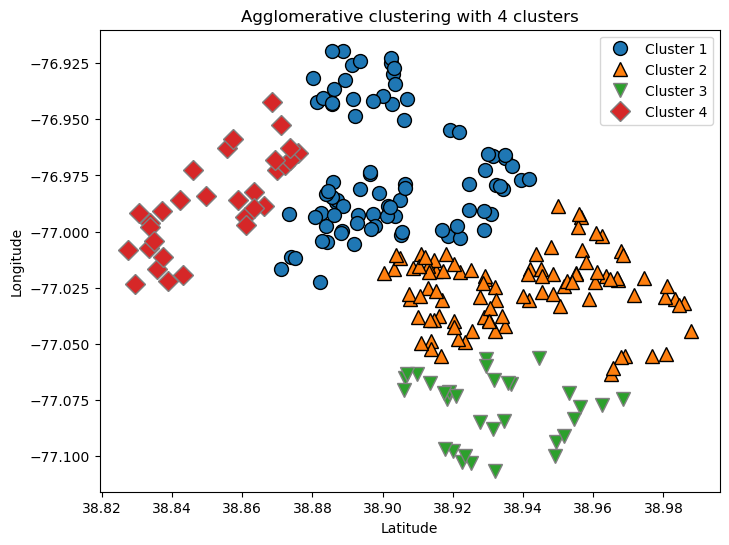

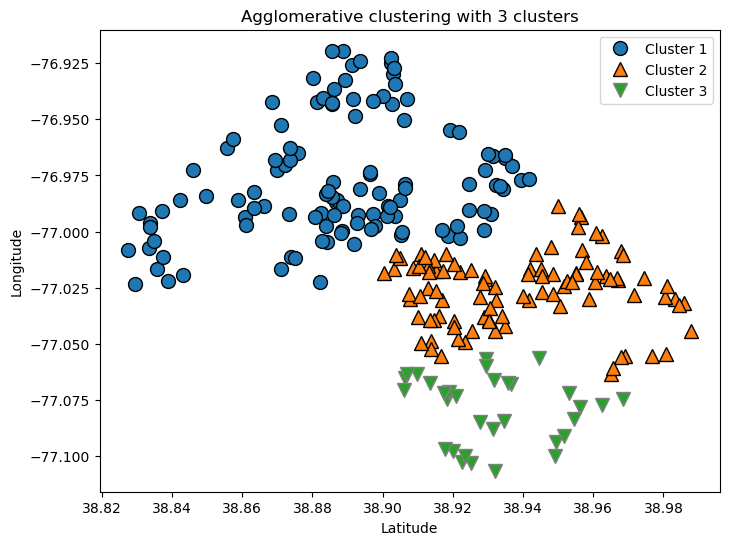

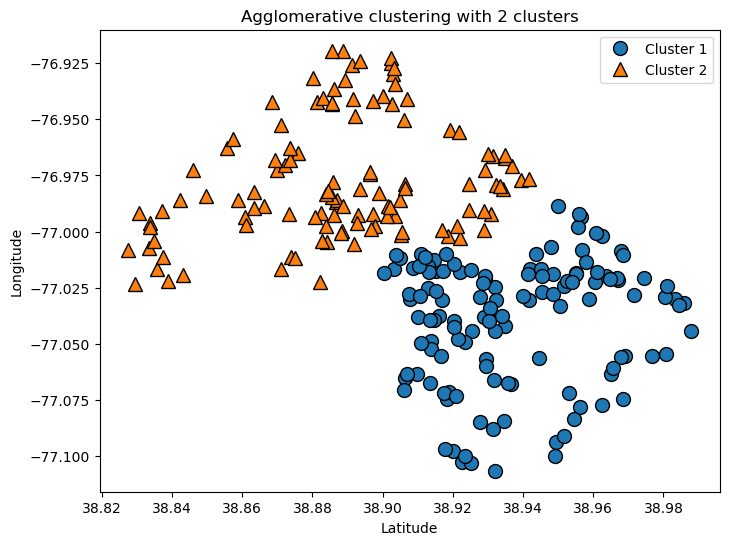

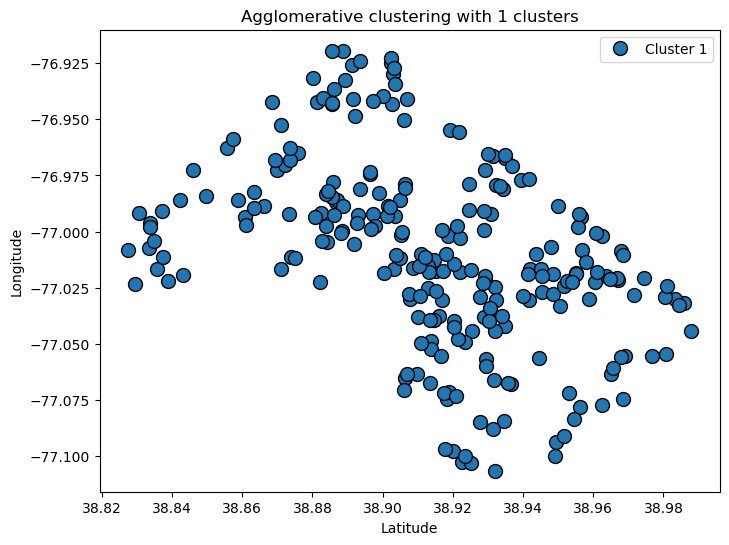

In [79]:
for cn in range(10, 0, -1):
    aggClustering(cn)

Another way to find the optimal amount of clusters, is by using a Dendogram.

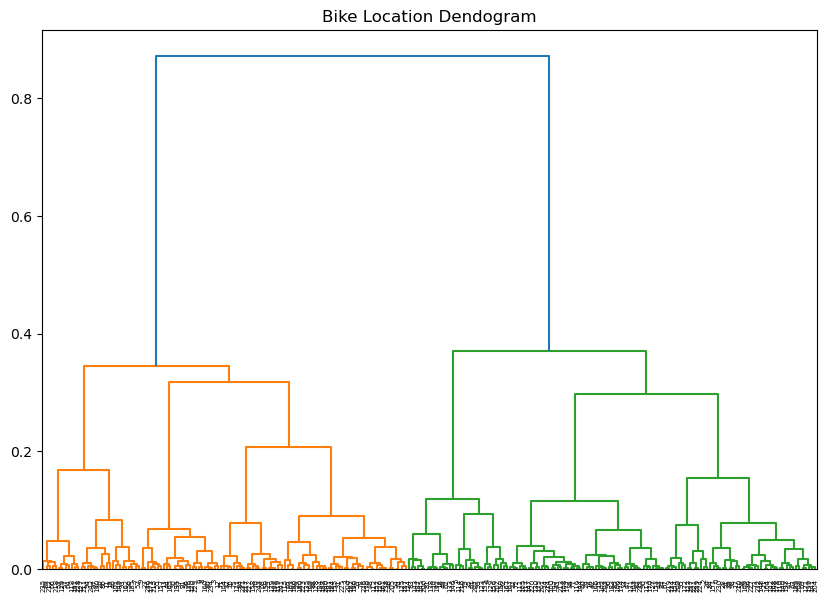

In [80]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Bike Location Dendogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

plt.axhline(y=150, color='r', linestyle='--')

We can now try to visualize this, and find the optimal amount of clusters. From the dendogram, we draw a horizontal line at the largest vertical line, and we get 7 clusters as the best. We will now visualize the data with 7 clusters.

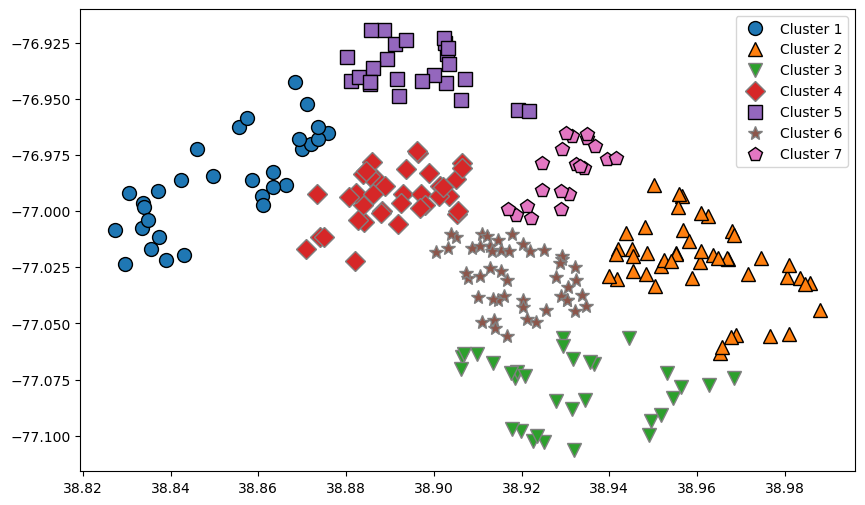

In [81]:

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

plt.figure(figsize=(10, 6))
#plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
mglearn.discrete_scatter(X['latitude'], X['longitude'], cluster.labels_)

plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7'], loc="best")

We cant necessarily tell exactly how many clusters we can create from this, but from earlier we get some idea of it. But to help us, we can use DBScan and different methods to determine the amount of clusters we need for a conclusive analysis.

In [82]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
clusters = dbscan.fit_predict(data)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


If we were to have values of -1, then we would define that as an outlier. What this basically mean is that, when we generalize all points to be within epsilon distance of at least 5 points, then with our specific epsilon, we can encapsulate all points with at least 5 points within epsilon distance. However, if we were to change our epsilon to something signifanctly smaller, we will have most definitely see some outliers, or some -1 from our dbscan.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


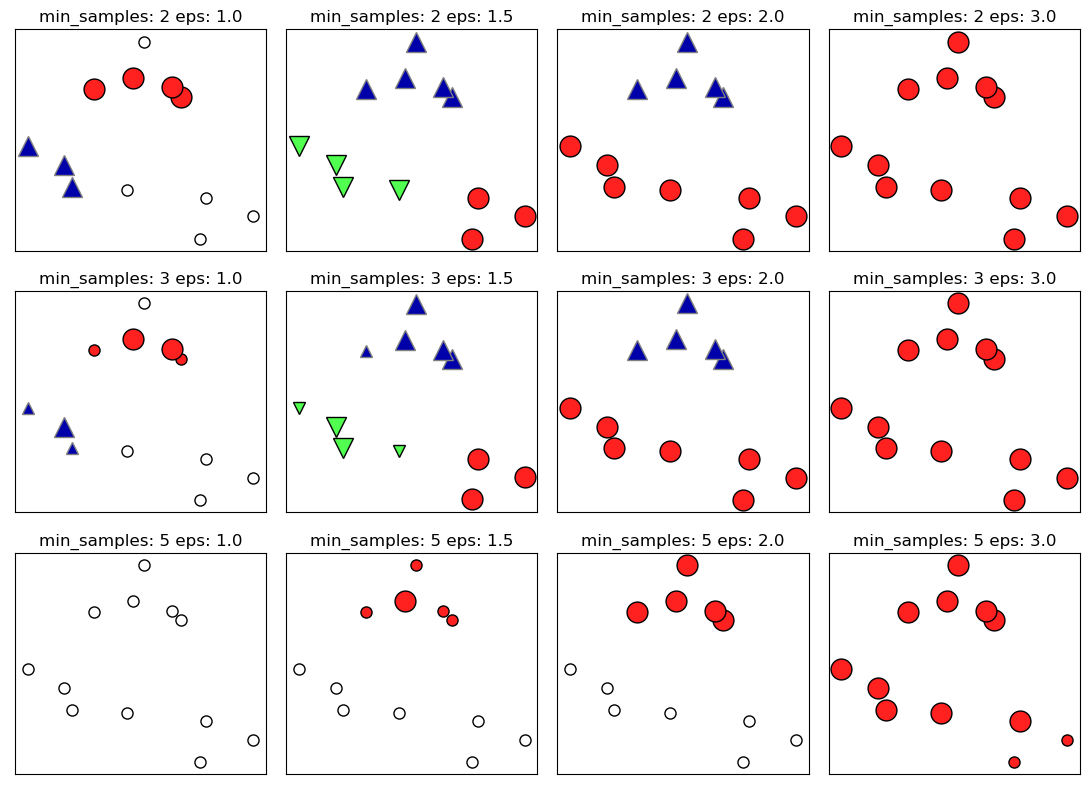

In [83]:
mglearn.plots.plot_dbscan()

From the above plot, we can see the amout of clusters that we create with different epsilons and min_samples. We notice that we get 3 pretty solid divided clusters with epsilon 1.5 and the minimum samples being 2 and 3. The others either simplify into 2 clusters or one big cluster. But we can further see if these are the appropriate amount of clusters, by using the Silhouette method.

## 5. Key-value stores (Lecture 9)

Exercise 1 from Lecture 9.

Firstly we import the data, but we need it in a dbm file.

In [84]:
import dbm
import os
import pandas as pd
from pathlib import Path

path = Path('C:/Users/rasmu/Documents/Kandidat/2 semester/datathings exam/data')
print(path)
os.chdir(path)

C:\Users\rasmu\Documents\Kandidat\2 semester\datathings exam\data


Here we have chosen our directory where we have the file. So now, we need a function which open the file and converts each line into a key-value pair.

In [85]:
def etl(filename):
    # Open the source text file
    f = open(filename, 'r', encoding='utf8')
    # Create a dbm storage
    db = dbm.open(filename + '-dbm', 'n')
    
    # Convert each text line into a key-value pair
    while True:
        line = f.readline()
        if (len(line) == 0):
            break

        # Get the key value separated by a space
        key, value = line.split(' ', 1)
        # Set the key value pair in the dbm storage
        db[key] = value
        
    # Remember to close the file and storage
    db.close()
    f.close()

Now we can use our etl function

In [86]:
etl('ID-Hashtag1')

The function generates files of .dat (binary data) and .dir (offeset indexes for keys). These files can we then open

In [87]:
db = dbm.open('ID-Hashtag-dbm', 'w')

Now we can see our keys from the file.

In [88]:
for key in db.keys():
    print(key)

b'1020253529628262401'
b'1020253529544577024'
b'1020253529309528065'
b'1020253528735010817'
b'1020253528680554496'
b'1020253528638533632'
b'1020253528558690306'
b'1020253528453832708'
b'1020253528365953025'
b'1020253527854239745'
b'1020253527829024768'
b'1020253527556481024'
b'1020253527447359489'
b'1020253527027961856'
b'1020253526839062528'
b'1020253526264463360'
b'1020253525970845696'
b'1020253525216022528'
b'1020253525165522949'
b'1020253525161283584'


We can also print the values

In [89]:
for value in db.values():
    print(value)

b'# #YouTube # # # # #\n'
b'#FormPro\n'
b'#TheGreatSeungri #KINGSEUNGRI_123\n'
b'#radicalismos #Libertad #Democracia #Paz #Europa #Mundo #StopRadicalismos\n'
b'#LateNightWhenever\n'
b'#FridayFreebie\n'
b'#phillyhereicome\n'
b'# #\n'
b'#projeto60kg #foconameta #instafit #fitnessgirl #agoraeuficotop\n'
b'#M #SAT #SHCP #VicenteFox #Abuso #Desigualdad #Pobreza #Mexicanos #Aduanas #EstadosUnidos #Guanajuato\n'
b'#epilepsyaction #epilepsypositivity #encephalitis\n'
b'#wafc\n'
b'#IMHO\n'
b'#grumpymonkey #parenting #workingmom #workingmomx\n'
b'#BAGANIMayariIsBack\n'
b'#LFCC\n'
b'#ASAPLovesHonolulu\n'
b'# #SexyZone #SexyZone\n'
b'#Bolttcoin #healthcoin #Blockchain #cryptocurrency\n'
b'#Hartberg #Finance #Job #Jobs #Hiring\n'


We can make another database aswell, so each distinct hashtag is a key.

In [90]:
db1 = dbm.open('ID-Hashtag1-dbm', 'n')

We're first using our keys from the first database (db), to get the hashtags for each key. After that, we check if the hashtag is in the new database, if it is we append the key to its list of values. If it isnt, we create a new list of values with the key.

In [91]:
for key in db.keys():
    # Get the hashtag value for this key
    hashtag = db[key].decode('utf-8')
    
    # Check if this hashtag is already in the new database
    if hashtag in db1:
        # If it is, append the key to its list of values
        value = db1[hashtag].decode('utf-8')
        value += ',' + key.decode('utf-8')
        db1[hashtag] = value.encode('utf-8')
    else:
        # If it isn't, create a new list of values with this key
        db1[hashtag] = key.decode('utf-8').encode('utf-8')

# Close the databases

Here we have saved it into a new database, where each distinct hashtag is a key.

In [92]:
db2 = dbm.open('ID-Hashtag1-dbm', 'n')
for key in db.keys():
    # Get the hashtag value for this key
    hashtag = db[key].decode('utf-8')
    
    # Check if this hashtag is already in the new database
    if hashtag in db2:
        # If it is, increment its count by 1
        count = int(db2[hashtag].decode('utf-8'))
        count += 1
        db2[hashtag] = str(count).encode('utf-8')
    else:
        # If it isn't, set its count to 1
        db2[hashtag] = b'1'
        
db2

In [93]:
import glob
import redis

# Connect to Redis database
r = redis.Redis(host='localhost', port=6379, db=0)

# Create a dictionary to store the counts for each hashtag
hashtag_counts = {}

# Process all files in the directory
for filename in glob.glob('C:\\Users\\magnu\\Downloads\\ID-Hashtag'):
    # Open the file and read its contents
    with open(filename, 'r') as f:
        contents = f.read()

    # Split the contents into lines
    lines = contents.split('\n')

    # Process each line in the file
    for line in lines:
        # Split the line into words
        words = line.split()

        # Check each word for hashtags
        for word in words:
            if word.startswith('#'):
                # Increment the count for this hashtag in the dictionary
                hashtag = word.lower()
                hashtag_counts[hashtag] = hashtag_counts.get(hashtag, 0) + 1

# Convert the dictionary to a list of tuples
hashtags = list(hashtag_counts.items())

# Sort the list by count in descending order
hashtags = sorted(hashtags, key=lambda x: x[1], reverse=True)



# Print the top 10 hashtags
print('Top 10 hashtags:')
for i in range(min(10, len(hashtags))):
    print(f'{i+1}. {hashtags[i][0]}: {hashtags[i][1]}')

Top 10 hashtags:


In [94]:
db.close()
db1.close()
db2.close()

## 6. Deep learning Lecture 10

Train a deep neural network to predict if a passenger would survive or not in the Titanic dataset and remember to do train-test split as well as other necessary pre-processing dataset.

In [3]:
titanic = pd.read_csv("data/titanic.csv")

In [4]:
titanic["Sex"] = titanic.Sex.replace({'male':0, 'female':1})
age_average = titanic['Age'].mean()
titanic['Age'].fillna(int(age_average), inplace=True)
titanic.dropna(inplace = True)

### One-Hot Encoding

In [5]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {titanic['Pclass'].unique()}")

# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass"], drop_first=False)

# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = titanic.Pclass

# Print out the first few rows
dataset_with_one_hot.head()

Possible values for PClass: [1 3 2]


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Pclass
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,0,0,1
10,11,1,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,3
11,12,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S,1,0,0,1


Same principle. We convert from cabin number and narrow it down to corresponding deck.

In [6]:
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Cabin"], drop_first=False)

cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

print(len(cabin_column_names), "cabins found")

146 cabins found


In [7]:
titanic["Deck"] = [c[0] for c in titanic.Cabin]

print("Decks: ", sorted(titanic.Deck.unique()))

dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Deck"], drop_first=False)

deck_of_cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Deck_"))



Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S,C


### Feature selection

We decide to use random forrest evaluation find the features that have the most influence towards survivability.

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S,C


In [10]:
features = titanic.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Deck', 'Embarked', 'PassengerId'])
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
X = titanic[features]
y = titanic['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
from sklearn.ensemble import RandomForestClassifier

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy of Random Forest: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Random Forest: 0.7540983606557377


In [14]:
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

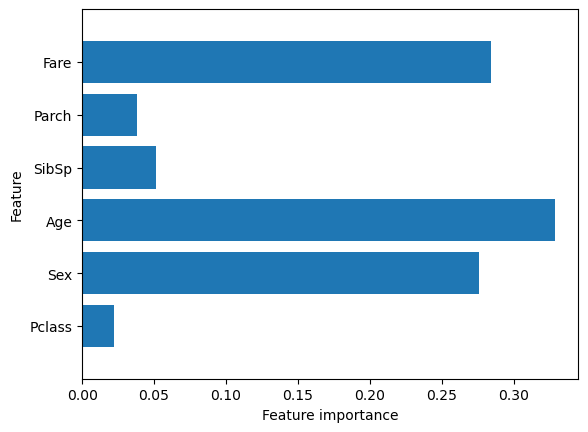

In [15]:
plot_feature_importances(forest, features)

This tells us that the features with most importance towards predicting survival is Fare, Sex and Age.

In [16]:
X = titanic[['Age', 'Fare', 'Sex']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
X_train = X_train.values.tolist()
X_train

[[19.0, 30.0, 1.0],
 [24.0, 69.3, 1.0],
 [40.0, 134.5, 1.0],
 [36.0, 512.3292, 0.0],
 [32.0, 76.2917, 1.0],
 [71.0, 34.6542, 0.0],
 [34.0, 13.0, 0.0],
 [47.0, 25.5875, 0.0],
 [45.5, 28.5, 0.0],
 [62.0, 26.55, 0.0],
 [24.0, 83.1583, 1.0],
 [58.0, 29.7, 0.0],
 [37.0, 29.7, 0.0],
 [16.0, 39.4, 1.0],
 [35.0, 90.0, 1.0],
 [47.0, 52.5542, 1.0],
 [29.0, 30.0, 0.0],
 [30.0, 93.5, 1.0],
 [45.0, 83.475, 0.0],
 [27.0, 10.5, 1.0],
 [43.0, 211.3375, 1.0],
 [17.0, 110.8833, 0.0],
 [11.0, 120.0, 0.0],
 [50.0, 55.9, 0.0],
 [29.0, 35.0, 0.0],
 [29.0, 221.7792, 0.0],
 [48.0, 52.0, 0.0],
 [29.0, 10.5, 1.0],
 [22.0, 55.0, 1.0],
 [29.0, 29.7, 0.0],
 [17.0, 57.0, 1.0],
 [44.0, 90.0, 0.0],
 [48.0, 26.55, 0.0],
 [3.0, 26.0, 0.0],
 [38.0, 227.525, 1.0],
 [52.0, 93.5, 1.0],
 [42.0, 7.65, 0.0],
 [25.0, 91.0792, 0.0],
 [47.0, 38.5, 0.0],
 [56.0, 83.1583, 1.0],
 [16.0, 86.5, 1.0],
 [36.0, 120.0, 1.0],
 [29.0, 66.6, 0.0],
 [24.0, 247.5208, 0.0],
 [32.0, 8.05, 0.0],
 [49.0, 110.8833, 0.0],
 [54.0, 51.8625, 0.0],
 [3

In [19]:
X_test = X_test.values.tolist()

In [20]:
y_train

887    1
641    1
319    1
679    1
218    1
      ..
587    1
618    1
329    1
627    1
194    1
Name: Survived, Length: 141, dtype: int64

In [21]:
y_train_oh = [dl.one_hot_encode(y, 2) for y in y_train]
y_train_oh

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],

In [22]:
y_test_oh = [dl.one_hot_encode(y, 2) for y in y_test]

In [23]:
import random
random.seed(0)
    
# Name them so we can turn train on and off
dropout1 = dl.Dropout(0.1)
dropout2 = dl.Dropout(0.1)
dropout3 = dl.Dropout(0.1)
    
t_model = dl.Sequential([
    dl.Linear(3, 32),  # Hidden layer 1: size 32
    dropout1,
    dl.Tanh(),
    dl.Linear(32, 16),   # Hidden layer 2: size 16
    dropout2,
    dl.Tanh(),
    dl.Linear(16, 8),   # Hidden layer 3: size 8
    dropout3,
    dl.Tanh(),
    dl.Linear(8, 2)    # Output layer: size 2
])

In [24]:
from numpy import argmax
import tqdm
def loop(model: dl.Layer,
             images: dl.List[dl.Tensor],
             labels: dl.List[dl.Tensor],
             loss: dl.Loss,
             optimizer: dl.Optimizer = None) -> None:
        correct = 0         # Track number of correct predictions.
        total_loss = 0.0    # Track total loss.
    
        with tqdm.trange(len(images)) as t:
            for i in t:
                predicted = model.forward(images[i])             # Predict.
                if argmax(predicted) == argmax(labels[i]):       # Check for
                    correct += 1                                 # correctness.
                total_loss += loss.loss(predicted, labels[i])    # Compute loss.
    
                # If we're training, backpropagate gradient and update weights.
                if optimizer is not None:
                    gradient = loss.gradient(predicted, labels[i])
                    model.backward(gradient)
                    optimizer.step(model)
    
                # And update our metrics in the progress bar.
                avg_loss = total_loss / (i + 1)
                acc = correct / (i + 1)
                t.set_description(f"mnist loss: {avg_loss:.3f} acc: {acc:.3f}")

In [25]:
from scratch.deep_learning import main
optimizer = dl.GradientDescent(learning_rate=0.01)
loss = dl.SSE()
    
# Enable dropout and train (takes > 20 minutes on my laptop!)
dropout1.train = dropout2.train = dropout3.train = True
loop(t_model, X_train, y_train_oh, loss, optimizer)

mnist loss: 0.463 acc: 0.688: 100%|██████████| 141/141 [00:00<00:00, 1248.24it/s]


In [26]:
# Disable dropout and evaluate
dropout1.train = dropout2.train = dropout3.train = False
loop(t_model, X_test, y_test_oh, loss)

mnist loss: 0.533 acc: 0.590: 100%|██████████| 61/61 [00:00<00:00, 1955.51it/s]


In [27]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred

[[0.22805912506700016, 0.7928239962773937],
 [0.22274270807219862, 0.8013668546793389],
 [0.2307500893015243, 0.7224945789948554],
 [0.22324229171472576, 0.8001443702124986],
 [0.22278056117596745, 0.8012273999487891],
 [0.22151188615257522, 0.800059161733228],
 [0.22121317793939207, 0.760245573646601],
 [0.257216318253351, 0.7327746593415372],
 [0.2225365093651201, 0.7988775710299756],
 [0.2572832457238286, 0.7598515325334891],
 [0.2552994660117864, 0.7245809691778441],
 [0.22203068818925428, 0.8010019067757053],
 [0.2272369394681413, 0.793500324308885],
 [0.2540462858195911, 0.7655810914406076],
 [0.23485222899074565, 0.7835635938258887],
 [0.21977736630468614, 0.7751883675006439],
 [0.2583247376698402, 0.7218966537117272],
 [0.22280893559883325, 0.7984482183372699],
 [0.2256731314041202, 0.7962752830258235],
 [0.2673105759563175, 0.64459120860598],
 [0.24795069453198768, 0.7676162470529402],
 [0.2244725335794119, 0.7978866355739956],
 [0.23154639734521776, 0.789566037972766],
 [0.23

In [28]:
dl.softmax(y_pred)

[[0.3624456789011856, 0.6375543210988144],
 [0.3592492389199311, 0.6407507610800688],
 [0.37948269665746426, 0.6205173033425357],
 [0.35964573644645514, 0.6403542635535449],
 [0.3592900542910802, 0.6407099457089198],
 [0.35926693399325504, 0.6407330660067451],
 [0.3684127003777872, 0.6315872996222127],
 [0.3833015053995959, 0.6166984946004042],
 [0.35977494917592545, 0.6402250508240745],
 [0.3769373019608496, 0.6230626980391504],
 [0.38478631626567306, 0.6152136837343269],
 [0.3591693505939981, 0.6408306494060019],
 [0.36209947558323763, 0.6379005244167624],
 [0.3748338002429255, 0.6251661997570744],
 [0.3661634338423899, 0.63383656615761],
 [0.36460992892652916, 0.6353900710734708],
 [0.3861388089117194, 0.6138611910882805],
 [0.3599366106849566, 0.6400633893150435],
 [0.3610978931197884, 0.6389021068802115],
 [0.4067829424727368, 0.5932170575272633],
 [0.37293044201819775, 0.6270695579818023],
 [0.36044941243610956, 0.6395505875638905],
 [0.3640058003700401, 0.63599419962996],
 [0.36

In [29]:
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]
y_pred_binary

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [30]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.5901639344262295
Recall: 1.0
Precision: 0.5901639344262295
Confusion matrix:
[[ 0 25]
 [ 0 36]]


In [31]:
optimizer = dl.Momentum(learning_rate=0.001, momentum=0.99)


dropout1.train = dropout2.train = dropout3.train = True

for _ in range(15):
    loop(t_model, X_train, y_train_oh, loss, optimizer)

mnist loss: 0.408 acc: 0.695: 100%|██████████| 141/141 [00:00<00:00, 1052.36it/s]


In [32]:
dropout1.train = dropout2.train = False
loop(t_model, X_test, y_test_oh, loss)

mnist loss: 0.476 acc: 0.590: 100%|██████████| 61/61 [00:00<00:00, 1868.16it/s]


In [33]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]

In [34]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.5901639344262295
Recall: 1.0
Precision: 0.5901639344262295
Confusion matrix:
[[ 0 25]
 [ 0 36]]


### Keras

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
keras_model = keras.Sequential(
    [
        keras.Input(shape=(3)),  # As we have 3 columns in our input data X
        layers.Dense(32, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(16, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(8, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(2, activation="softmax")  # Here we specify that we want the last layer to have a softmax activation function
    ]
)

In [37]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

In [38]:
keras_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
X_train_keras = np.array(X_train)
X_train_keras.shape

(141, 3)

In [40]:
y_train_keras = np.array(y_train_oh)
y_train_keras.shape

(141, 2)

In [41]:
keras_model.fit(X_train_keras, y_train_keras, batch_size=1, epochs=16)

Epoch 1/16
141/141 [==============================] - 1s 641us/step - loss: 0.6144 - accuracy: 0.6596
Epoch 2/16
141/141 [==============================] - 0s 593us/step - loss: 0.6379 - accuracy: 0.6950
Epoch 3/16
141/141 [==============================] - 0s 567us/step - loss: 0.6042 - accuracy: 0.6667
Epoch 4/16
141/141 [==============================] - 0s 578us/step - loss: 0.6061 - accuracy: 0.6950
Epoch 5/16
141/141 [==============================] - 0s 593us/step - loss: 0.5952 - accuracy: 0.7376
Epoch 6/16
141/141 [==============================] - 0s 586us/step - loss: 0.5994 - accuracy: 0.6879
Epoch 7/16
141/141 [==============================] - 0s 599us/step - loss: 0.6183 - accuracy: 0.6596
Epoch 8/16
141/141 [==============================] - 0s 572us/step - loss: 0.6117 - accuracy: 0.6738
Epoch 9/16
141/141 [==============================] - 0s 547us/step - loss: 0.6092 - accuracy: 0.6525
Epoch 10/16
141/141 [==============================] - 0s 581us/step - loss: 0.591

In [42]:
score = keras_model.evaluate(np.array(X_test), np.array(y_test_oh), verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6702759265899658
Test accuracy: 0.6557376980781555


In [43]:
y_pred_keras = keras_model.predict(np.array(X_test))
y_pred_keras

2/2 [==============================] - 0s 2ms/step


array([[0.19218217, 0.8078178 ],
       [0.15365237, 0.8463476 ],
       [0.17519227, 0.8248077 ],
       [0.17422408, 0.82577586],
       [0.15404718, 0.84595287],
       [0.20274945, 0.79725057],
       [0.1918634 , 0.8081366 ],
       [0.5120287 , 0.48797128],
       [0.15412654, 0.8458734 ],
       [0.46364954, 0.53635055],
       [0.47663832, 0.52336174],
       [0.2107413 , 0.7892587 ],
       [0.18811987, 0.8118802 ],
       [0.4351379 , 0.564862  ],
       [0.24457127, 0.7554287 ],
       [0.20703642, 0.79296356],
       [0.52435863, 0.47564134],
       [0.15559955, 0.84440047],
       [0.19552448, 0.8044755 ],
       [0.62566066, 0.37433937],
       [0.4211825 , 0.57881755],
       [0.17279643, 0.8272035 ],
       [0.205214  , 0.7947859 ],
       [0.20752077, 0.7924792 ],
       [0.42613968, 0.57386035],
       [0.41785827, 0.58214176],
       [0.15357938, 0.8464206 ],
       [0.21074091, 0.7892591 ],
       [0.45209414, 0.54790586],
       [0.43567863, 0.5643213 ],
       [0.

In [44]:
y_pred_keras_binary = [1 if x[1] > 0.5 else 0 for x in y_pred_keras]
y_pred_keras_binary

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [45]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_keras_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_keras_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_keras_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_keras_binary))

Accuracy: 0.6557377049180327
Recall: 0.9722222222222222
Precision: 0.6363636363636364
Confusion matrix:
[[ 5 20]
 [ 1 35]]


## 7. MapReduce (Lecture 13)

All exercises from Lecture 13.

In [46]:
from multiprocessing import Pool
import StringLengthMR as slmr
import time
import pandas as pd
from collections import Counter


df = pd.read_csv('data/ID-Hashtag', header=None)

In [47]:
def mapper(row):
    count = row.count('#')
    return (count)

In [48]:
def reducer(a, b):
    return a + b

In [49]:
from functools import reduce
num_hashtags = reduce(reducer, map(mapper, df[0]))

In [50]:
num_hashtags

76

In [51]:
#hashtags_grouped = df[0].str.extractall(r'#(\w+)\b')[0].groupby(level=0)

# Filter the dataframe to remove rows without a character after a hastag
df_filtered = df[df[0].str.contains(r'#\w+')]
hashtags_grouped = df_filtered[0].str.extractall(r'#(\w+)\b')[0].groupby(level=0)
df_filtered = hashtags_grouped.apply(list)
lst_of_lsts = df_filtered

In [52]:
from collections import Counter
from functools import reduce

def map_func(sublist):
    return Counter(sublist)

def reduce_func(counter1, counter2):
    return counter1 + counter2

def map_reduce(lst_of_lsts):
    # Map
    mapped = list(map(map_func, lst_of_lsts))
    
    # Reduce
    reduced = reduce(reduce_func, mapped)
    
    # Map
    word_counts = dict(reduced)
    
    # Reduce
    most_common_word = max(word_counts, key=word_counts.get)
    
    return most_common_word

most_common_word = map_reduce(lst_of_lsts)


In [53]:
most_common_word

'NoConfidenceMotion'

## 8. Time Series Analysis (Lecture 14 & 15)

Do a time series analysis of the Copenhagen ice cream dataset ("cph_ice_cream_searches.csv") from Lectures 14 and 15.

Start by importing the necessary packages

In [54]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

Next we import our dataset

In [55]:
data = pd.read_csv('data\cph_ice_cream_searches.csv')
data.head()

,Month,ismejeriet: (Capital Region of Denmark),paradis is: (Capital Region of Denmark),østerberg is: (Capital Region of Denmark),nicecream: (Capital Region of Denmark)
0,2013-02,0,13,0,0
1,2013-03,12,52,5,0
2,2013-04,11,85,0,0
3,2013-05,7,94,0,0
4,2013-06,11,81,0,0


In [56]:
from datetime import datetime
#data = data.set_index('Month')
data.index = [datetime.strptime(x, "%Y-%m") for x in data['Month']]
data = data.drop(columns = ['Month'])
data.head()

,ismejeriet: (Capital Region of Denmark),paradis is: (Capital Region of Denmark),østerberg is: (Capital Region of Denmark),nicecream: (Capital Region of Denmark)
2013-02-01,0,13,0,0
2013-03-01,12,52,5,0
2013-04-01,11,85,0,0
2013-05-01,7,94,0,0
2013-06-01,11,81,0,0


Our dataset is already cleaned from strings, so we can already start the time analysis. Here is a plot every 12th months of the sale at the ice cream stores.

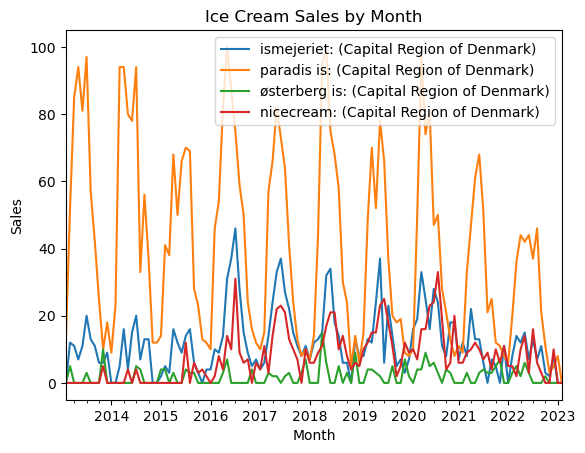

In [57]:
# Plot the data
data.plot()

# Set the plot title and axis labels
plt.title('Ice Cream Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')

# Display the plot
plt.show()

This removes any kind of seasonal data. Because ice cream is most likely bought during the summer. So this isnt that informative.

Since all the ice cream stores are in copenhagen, we have chosen to collect all the sales from the different stores into a single collective sales columns. 

In [58]:
data['CombinedSales'] = data['ismejeriet: (Capital Region of Denmark)']+data['paradis is: (Capital Region of Denmark)']+data['østerberg is: (Capital Region of Denmark)']+data['nicecream: (Capital Region of Denmark)']
data = data.drop(columns = ['ismejeriet: (Capital Region of Denmark)','paradis is: (Capital Region of Denmark)','østerberg is: (Capital Region of Denmark)','nicecream: (Capital Region of Denmark)'])
data

,CombinedSales
2013-02-01,13
2013-03-01,69
2013-04-01,96
2013-05-01,101
2013-06-01,92
...,...
2022-10-01,16
2022-11-01,5
2022-12-01,23
2023-01-01,8


In [59]:
data_series = pd.Series(data["CombinedSales"])
data_series.head()

2013-02-01     13
2013-03-01     69
2013-04-01     96
2013-05-01    101
2013-06-01     92
Name: CombinedSales, dtype: int64

<AxesSubplot:>

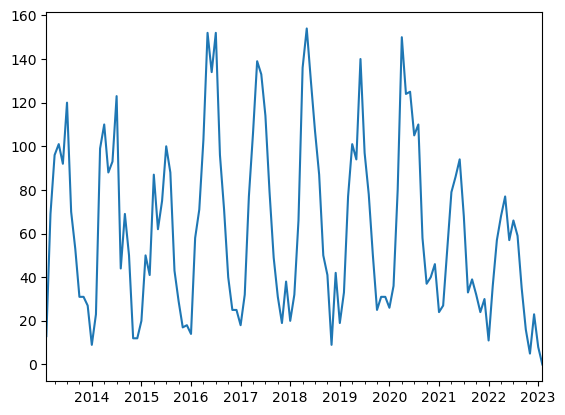

In [60]:
data_series.plot()

We can also show the percentage change of the sales for each month during the years. So this shows the percentile change from each month during the year.

In [61]:
data['CombinedSales'].pct_change()

2013-02-01         NaN
2013-03-01    4.307692
2013-04-01    0.391304
2013-05-01    0.052083
2013-06-01   -0.089109
                ...   
2022-10-01   -0.542857
2022-11-01   -0.687500
2022-12-01    3.600000
2023-01-01   -0.652174
2023-02-01   -1.000000
Name: CombinedSales, Length: 121, dtype: float64

This needs a visualization.

<AxesSubplot:>

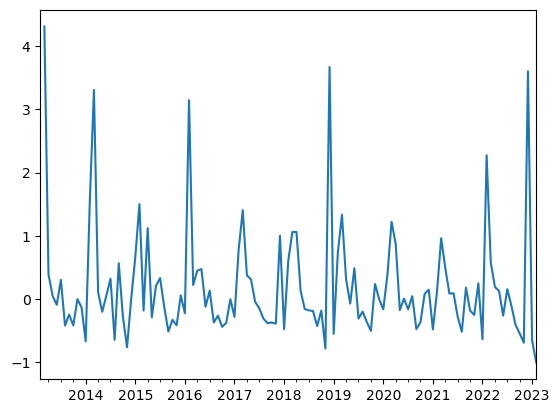

In [62]:
data['CombinedSales'].pct_change().plot()

Everytime the line declines, that means there is sold less ice-cream than the month before. We can also show the numerical differences of the number of sales.

In [63]:
data['CombinedSales'].diff()

2013-02-01     NaN
2013-03-01    56.0
2013-04-01    27.0
2013-05-01     5.0
2013-06-01    -9.0
              ... 
2022-10-01   -19.0
2022-11-01   -11.0
2022-12-01    18.0
2023-01-01   -15.0
2023-02-01    -8.0
Name: CombinedSales, Length: 121, dtype: float64

We will now combine the sales and difference, to show how "diff" basically works. It takes the difference between the value at index [i+1], and subtracts the value of index [i]. The first value is of course NaN, since we dont have a prior month of index 0 in our dataset. 

In [64]:
data.join(data['CombinedSales'].diff(), rsuffix="difference")

,CombinedSales,CombinedSalesdifference
2013-02-01,13,NaN
2013-03-01,69,56.0
2013-04-01,96,27.0
2013-05-01,101,5.0
2013-06-01,92,-9.0
...,...,...
2022-10-01,16,-19.0
2022-11-01,5,-11.0
2022-12-01,23,18.0
2023-01-01,8,-15.0


So the "difference", just outputs the new row where we subtract the previous row. 

Next up we want to do some Time Series modelling, to try and predict the combined sales for the future. To do this, we're gonna use the data from the most present time. 

This is our test-data, we're doing a split of 20% test data.

In [65]:
#data = pd.Series(data["CombinedSales"])
test_data = data_series[-25:]
print(len(test_data))
test_data

25


2021-02-01    27
2021-03-01    53
2021-04-01    79
2021-05-01    86
2021-06-01    94
2021-07-01    68
2021-08-01    33
2021-09-01    39
2021-10-01    32
2021-11-01    24
2021-12-01    30
2022-01-01    11
2022-02-01    36
2022-03-01    57
2022-04-01    68
2022-05-01    77
2022-06-01    57
2022-07-01    66
2022-08-01    59
2022-09-01    35
2022-10-01    16
2022-11-01     5
2022-12-01    23
2023-01-01     8
2023-02-01     0
Name: CombinedSales, dtype: int64

This is our training data.

In [66]:
train_data = data_series[:-25]
print(len(train_data))
train_data

96


2013-02-01     13
2013-03-01     69
2013-04-01     96
2013-05-01    101
2013-06-01     92
             ... 
2020-09-01     58
2020-10-01     37
2020-11-01     40
2020-12-01     46
2021-01-01     24
Name: CombinedSales, Length: 96, dtype: int64

If we try to find the rolling averages with both 4 and 12. We can generally see how the sales change during the months and years.

In [67]:
print(train_data.rolling(4).mean())
print(train_data.rolling(12).mean())

2013-02-01      NaN
2013-03-01      NaN
2013-04-01      NaN
2013-05-01    69.75
2013-06-01    89.50
              ...  
2020-09-01    99.50
2020-10-01    77.50
2020-11-01    61.25
2020-12-01    45.25
2021-01-01    36.75
Name: CombinedSales, Length: 96, dtype: float64
2013-02-01          NaN
2013-03-01          NaN
2013-04-01          NaN
2013-05-01          NaN
2013-06-01          NaN
                ...    
2020-09-01    75.083333
2020-10-01    76.083333
2020-11-01    76.833333
2020-12-01    78.083333
2021-01-01    77.916667
Name: CombinedSales, Length: 96, dtype: float64


This can look a bit messy, so we join them into a table. It's important to note, that rolling average of 4, will show after 4 entries, and rolling average of 12 will show after 12 entries. Since it needs do the average of the previous 4 or 12.

In [68]:
data_w_RM = data.join(train_data.rolling(4).mean(), rsuffix="_RM(4)").join(
    train_data.rolling(12).mean(), rsuffix="_RM(12)")
data_w_RM.head(20)

,CombinedSales,CombinedSales_RM(4),CombinedSales_RM(12)
2013-02-01,13,NaN,NaN
2013-03-01,69,NaN,NaN
2013-04-01,96,NaN,NaN
2013-05-01,101,69.75,NaN
2013-06-01,92,89.50,NaN
2013-07-01,120,102.25,NaN
2013-08-01,70,95.75,NaN
2013-09-01,53,83.75,NaN
2013-10-01,31,68.50,NaN
2013-11-01,31,46.25,NaN


We can also show this in a plot. Of how the different sales differ between every 4 and 12 months.

<AxesSubplot:>

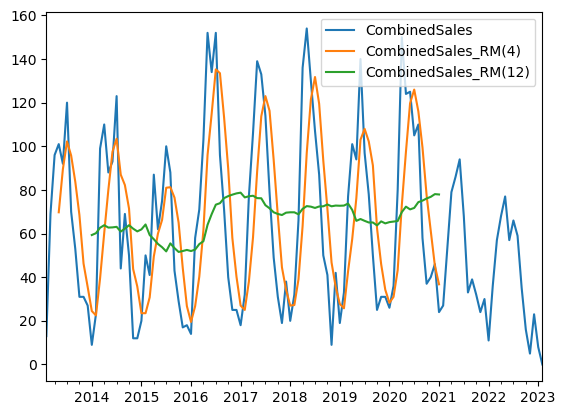

In [69]:
data_w_RM.plot()

When we generalize across an entire year, it fluctuates less compared to every 4 months. This is because, when finding the rolling average of the entire year, we get the high sales from the summer and low sales from the winter. So it gives a pretty good view in general of how the overall sales has been. The rolling average with every 4 months, shows the specific seasons and how bad or good the different months are in the ice cream business.

We can now use our rolling averages to do some predictions.

In [70]:
def predict_rolling_mean(series, window):
    return np.mean(series[-window:])

In [71]:
train_data.tail(6)

2020-08-01    110
2020-09-01     58
2020-10-01     37
2020-11-01     40
2020-12-01     46
2021-01-01     24
Name: CombinedSales, dtype: int64

In [72]:
predict_rolling_mean(train_data, 4)

36.75

We here define a function, which uses a rolling forecasting approach to forecast future values for the time series. 

In [73]:
def forecast_rolling_function(series, pred_function, forecast_window):
    new_series = series
    for _ in range(forecast_window):
        new_value = pred_function(new_series)
        new_index = new_series.shift(1, freq="infer").index[-1]
        new_series = pd.concat([new_series, pd.Series([new_value], index = [new_index])])
    return new_series

In [74]:
forecast_rolling_function(train_data, lambda x: predict_rolling_mean(x, 4), 6)

2013-02-01     13.000000
2013-03-01     69.000000
2013-04-01     96.000000
2013-05-01    101.000000
2013-06-01     92.000000
                 ...    
2021-03-01     36.687500
2021-04-01     35.859375
2021-05-01     33.324219
2021-06-01     35.655273
2021-07-01     35.381592
Length: 102, dtype: float64

In [75]:
RM4_forecast = forecast_rolling_function(train_data, lambda x: predict_rolling_mean(x, 4), 24)
RM12_forecast = forecast_rolling_function(train_data, lambda x: predict_rolling_mean(x, 12), 24)

In [76]:
RM4_forecast


2013-02-01     13.000000
2013-03-01     69.000000
2013-04-01     96.000000
2013-05-01    101.000000
2013-06-01     92.000000
                 ...    
2022-09-01     35.100241
2022-10-01     35.100698
2022-11-01     35.099678
2022-12-01     35.099832
2023-01-01     35.100112
Length: 120, dtype: float64

In [77]:
RM12_forecast

2013-02-01     13.000000
2013-03-01     69.000000
2013-04-01     96.000000
2013-05-01    101.000000
2013-06-01     92.000000
                 ...    
2022-09-01     65.274233
2022-10-01     65.678390
2022-11-01     66.099391
2022-12-01     66.391403
2023-01-01     66.550838
Length: 120, dtype: float64

What's special about the "forecast_rolling_function" is that it puts the same weight everywhere, meaning every single data is equally relevant. However, that is not how it would be in real life, we would expect the most recent years to be more influential on the prediction. So instead we try to use Expontential weighting.

<AxesSubplot:>

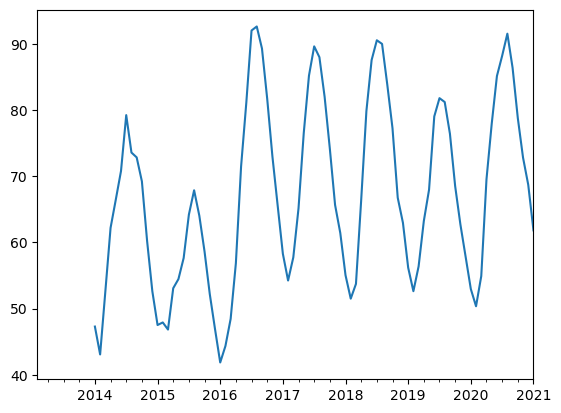

In [78]:
train_data.ewm(span=12, min_periods=12).mean().plot()

What we see here, is the data is getting a bit more even. With lower local extremum and bigger local minimums.

<AxesSubplot:>

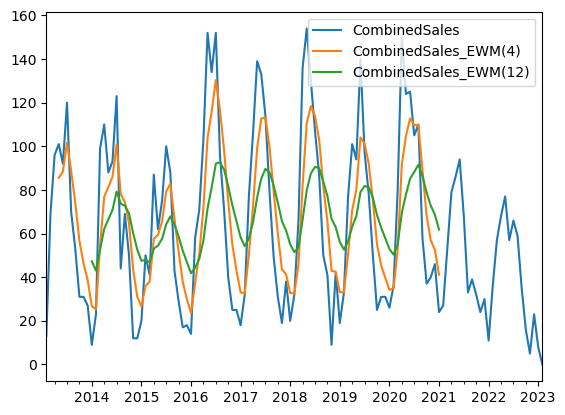

In [79]:
data_EWM = data.join(train_data.ewm(span=4, min_periods=4).mean(), rsuffix="_EWM(4)").join(
    train_data.ewm(span=12, min_periods=12).mean(), rsuffix="_EWM(12)")
data_EWM.plot()

Compared to the earlier graph, the two average rolling look a bit more alike and are not that much different anymore.

We can additionally adjust the weighting in the exponential decay.

<AxesSubplot:>

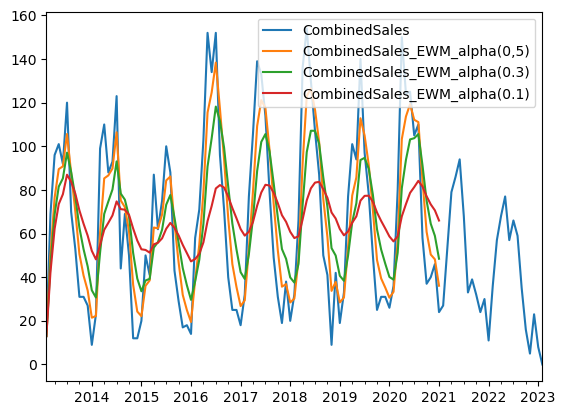

In [80]:
data_EWM = data.join(train_data.ewm(alpha = 0.5).mean(), rsuffix="_EWM_alpha(0,5)").join(
    train_data.ewm(alpha = 0.3).mean(), rsuffix="_EWM_alpha(0.3)").join(
    train_data.ewm(alpha = 0.1).mean(), rsuffix="_EWM_alpha(0.1)")
data_EWM.plot()

Alpha in this example, represents the degree of exponential decay for the weights given to the observations. A small alpha will give more weight to recent observations, while a larger will give more weight to past observations. But in our plot, it looks like the higher the alpha the closer we get to the actual CombinedSales, this is because our latest entries are from 2013 and the first entries are from 2021. Lets try to do some forecasting on this.

In [81]:
def predict_rolling_ewm(series, alpha):
    return series.ewm(alpha = alpha).mean()[-1]

In [82]:
predict_rolling_ewm(train_data, 0.1)

65.97844136100811

This means that we predict to be around 66 sales for each month during the year, this is the average.

In [83]:
forecast_rolling_function(train_data, lambda x: predict_rolling_ewm(x, 0.1), 6)

2013-02-01     13.000000
2013-03-01     69.000000
2013-04-01     96.000000
2013-05-01    101.000000
2013-06-01     92.000000
                 ...    
2021-03-01     65.978441
2021-04-01     65.978441
2021-05-01     65.978441
2021-06-01     65.978441
2021-07-01     65.978441
Length: 102, dtype: float64

Here we see how the predicted amount of sales from each month. As we see, May have a lot of sales, while january doesnt in 2013. But it looks like it's converging at 2021 to the mean value.

In [84]:
EWM01_forecast = pd.Series(forecast_rolling_function(train_data, lambda x: predict_rolling_ewm(x, 0.1), 24))[-24:]
EWM05_forecast = pd.Series(forecast_rolling_function(train_data, lambda x: predict_rolling_ewm(x, 0.5), 24))[-24:]

In [85]:
EWM01_forecast

2021-02-01    65.978441
2021-03-01    65.978441
2021-04-01    65.978441
2021-05-01    65.978441
2021-06-01    65.978441
2021-07-01    65.978441
2021-08-01    65.978441
2021-09-01    65.978441
2021-10-01    65.978441
2021-11-01    65.978441
2021-12-01    65.978441
2022-01-01    65.978441
2022-02-01    65.978441
2022-03-01    65.978441
2022-04-01    65.978441
2022-05-01    65.978441
2022-06-01    65.978441
2022-07-01    65.978441
2022-08-01    65.978441
2022-09-01    65.978441
2022-10-01    65.978441
2022-11-01    65.978441
2022-12-01    65.978441
2023-01-01    65.978441
dtype: float64

In [86]:
EWM05_forecast

2021-02-01    36.09634
2021-03-01    36.09634
2021-04-01    36.09634
2021-05-01    36.09634
2021-06-01    36.09634
2021-07-01    36.09634
2021-08-01    36.09634
2021-09-01    36.09634
2021-10-01    36.09634
2021-11-01    36.09634
2021-12-01    36.09634
2022-01-01    36.09634
2022-02-01    36.09634
2022-03-01    36.09634
2022-04-01    36.09634
2022-05-01    36.09634
2022-06-01    36.09634
2022-07-01    36.09634
2022-08-01    36.09634
2022-09-01    36.09634
2022-10-01    36.09634
2022-11-01    36.09634
2022-12-01    36.09634
2023-01-01    36.09634
dtype: float64

With two different alphas, our mean value changes quite a bit. From around 66 sales a month to 36 sales a month, but what is closest to the actual combined sales?

In [87]:
print(type(test_data))


<class 'pandas.core.series.Series'>


<AxesSubplot:>

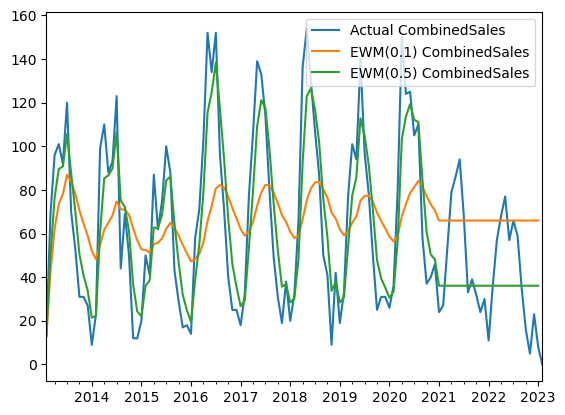

In [88]:
forecast_ewm_df = pd.concat([pd.Series(pd.concat([train_data, test_data]), name = "Actual CombinedSales"),
                pd.Series(pd.concat([train_data.ewm(alpha = 0.1).mean(), EWM01_forecast]), name = "EWM(0.1) CombinedSales"),
             pd.Series(pd.concat([train_data.ewm(alpha = 0.5).mean(), EWM05_forecast]), name = "EWM(0.5) CombinedSales")],
                        axis=1)
forecast_ewm_df.plot()

As we noticed earlier, the exponential weighted moving average with alpha value at 0.5 we aproach the actual combined sales.

ARIMA stands for AutoRegressive Integrated Moving Average, which is used for forecasting future values based on past observations. Arima provides more parameters, which are able to adjust weighting within the time-series, we can think of these as different weighting parameters, as we saw before with EWM.

In [89]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import matplotlib.pyplot as plt

We can define the mean average percentage error using this:

In [90]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

We can also check for stationarity.

In [91]:
sm.tsa.stattools.adfuller(train_data)

(-1.5305733573436255,
 0.5183365929307464,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 741.589522865906)

We are non-stationary, since we failed to reject the null hypothesis.

In [92]:
print("The p-value of the Dickey-Fuller test is: {0}".format(sm.tsa.stattools.adfuller(train_data)[1]))

The p-value of the Dickey-Fuller test is: 0.5183365929307464


In [93]:
ice1 = train_data.diff().dropna()
ice1

2013-03-01    56.0
2013-04-01    27.0
2013-05-01     5.0
2013-06-01    -9.0
2013-07-01    28.0
              ... 
2020-09-01   -52.0
2020-10-01   -21.0
2020-11-01     3.0
2020-12-01     6.0
2021-01-01   -22.0
Name: CombinedSales, Length: 95, dtype: float64

In [94]:
print("The p-value of the Dickey-Fuller test is: {0}".format(sm.tsa.stattools.adfuller(ice1)[1]))

The p-value of the Dickey-Fuller test is: 0.010115772429231156


Now, we're stationary. This means that our timeseries is seasonal, which makes sense, since the data describes the amount of Ice-Cream sales in Copenhagen. Which is more prominent in the summer.

c:\Users\rasmu\Documents\Dev\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


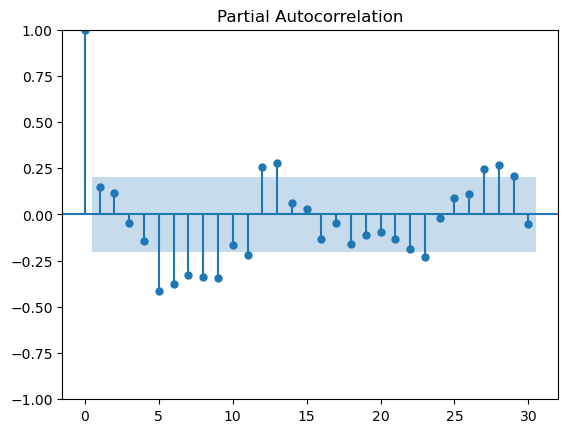

In [95]:
smt.graphics.plot_pacf(ice1, lags=30)
plt.show()

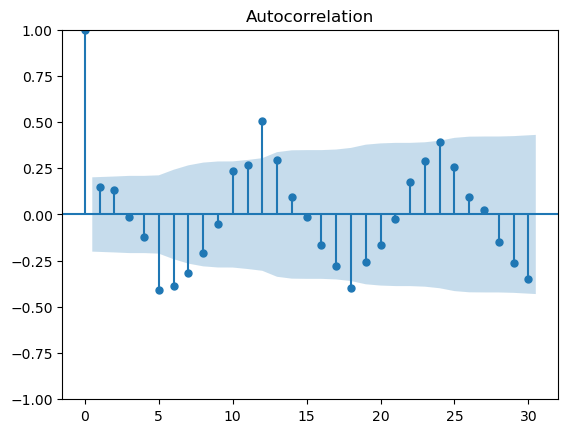

In [96]:
smt.graphics.plot_acf(ice1, lags=30)
plt.show()

In [97]:
ARIMA_model = sm.tsa.arima.ARIMA(np.array(train_data), order=(3, 1, 2))

In [98]:
ARIMA_model_fit = ARIMA_model.fit()
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -424.842
Date:                Thu, 23 Mar 2023   AIC                            861.685
Time:                        00:17:04   BIC                            877.008
Sample:                             0   HQIC                           867.877
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3402      0.105     12.726      0.000       1.134       1.547
ar.L2         -0.3326      0.183     -1.819      0.069      -0.691       0.026
ar.L3         -0.3764      0.107     -3.505      0.0

c:\Users\rasmu\Documents\Dev\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rasmu\Documents\Dev\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [99]:
ARIMA_fitted_n_forecast = pd.concat([pd.Series(ARIMA_model_fit.fittedvalues, index = train_data.index),
                                     pd.Series(ARIMA_model_fit.forecast(25), index = test_data.index)])

In [100]:
forecast_ARIMA_df = pd.concat([pd.Series(pd.concat([train_data, test_data]), name = "Actual CombinedSales"),
                         pd.Series(ARIMA_fitted_n_forecast, name = "ARIMA(3,1,2) model")],
                        axis=1)

<AxesSubplot:>

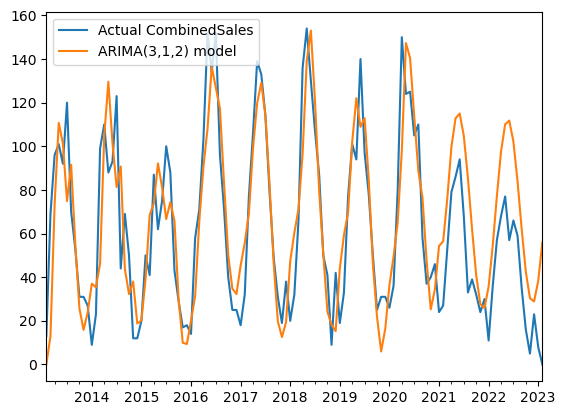

In [101]:
forecast_ARIMA_df.plot()

## 9. IoT (Lecture 17)

All exercises from Lecture 17.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
data = pd.read_csv('data/diabetes.csv')

In [104]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


So now we have the data. Next we do is choose our features. We do this by dropping the other columns that we dont want. We also drop the Outcome feature, since it's our class label.

In [105]:
features = data.columns.drop(['Pregnancies','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Outcome'])
features

Index(['Glucose', 'BloodPressure', 'Insulin'], dtype='object')

Now we can define our x and y for the data.

In [106]:
x = data[features]
y = data['Outcome']
print(x,y)

     Glucose  BloodPressure  Insulin
0        148             72        0
1         85             66        0
2        183             64        0
3         89             66       94
4        137             40      168
..       ...            ...      ...
763      101             76      180
764      122             70        0
765      121             72      112
766      126             60        0
767       93             70        0

[768 rows x 3 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


The next exercise, is to Normalize our features to between [0,1] using MinMax scaling. The MinMax datascaling works by subtracting the minimum value in the feature and then divides by the range. Where the range is the difference between the original maximum and original minimum. So if the max is 5 and the minimum is 1, and we have the value 3. Then we say (3-1)/4=0.5. What this does, is ensuring that all of our data is scaled between 0 and 1, which is an easier way to represent outlier data and show it compared to the mean.

In [107]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler(feature_range=(0,1))
X_scaled = pd.DataFrame(minMaxScaler.fit_transform(x), columns = x.columns)
X_scaled.describe()

,Glucose,BloodPressure,Insulin
count,768.000000,768.000000,768.000000
mean,0.607510,0.566438,0.094326
std,0.160666,0.158654,0.136222
min,0.000000,0.000000,0.000000
25%,0.497487,0.508197,0.000000
50%,0.587940,0.590164,0.036052
75%,0.704774,0.655738,0.150414
max,1.000000,1.000000,1.000000


In [108]:
X_scaled

,Glucose,BloodPressure,Insulin
0,0.743719,0.590164,0.000000
1,0.427136,0.540984,0.000000
2,0.919598,0.524590,0.000000
3,0.447236,0.540984,0.111111
4,0.688442,0.327869,0.198582
...,...,...,...
763,0.507538,0.622951,0.212766
764,0.613065,0.573770,0.000000
765,0.608040,0.590164,0.132388
766,0.633166,0.491803,0.000000


We have now normalized our data. The next exercise involves saving the scaled data into another dataset. So firstly we change y to being a dataframe, and then we concatenate them.

In [109]:
yf = pd.DataFrame(y, columns=['Outcome'])
S = pd.concat([X_scaled,y], axis=1)
S

,Glucose,BloodPressure,Insulin,Outcome
0,0.743719,0.590164,0.000000,1
1,0.427136,0.540984,0.000000,0
2,0.919598,0.524590,0.000000,1
3,0.447236,0.540984,0.111111,0
4,0.688442,0.327869,0.198582,1
...,...,...,...,...
763,0.507538,0.622951,0.212766,0
764,0.613065,0.573770,0.000000,0
765,0.608040,0.590164,0.132388,0
766,0.633166,0.491803,0.000000,1


In [110]:
features = S.columns.drop('Outcome')
features

Index(['Glucose', 'BloodPressure', 'Insulin'], dtype='object')

In [111]:
X = S[features]

In [112]:
X= X[:100]
X

,Glucose,BloodPressure,Insulin
0,0.743719,0.590164,0.000000
1,0.427136,0.540984,0.000000
2,0.919598,0.524590,0.000000
3,0.447236,0.540984,0.111111
4,0.688442,0.327869,0.198582
...,...,...,...
95,0.723618,0.590164,0.269504
96,0.462312,0.508197,0.000000
97,0.356784,0.393443,0.089835
98,0.467337,0.409836,0.075650


In [113]:
y = S[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [114]:
y = y[:100]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
95,0
96,0
97,0
98,0


This next exercise is regarding MQTT (Message Queue Telemetry Transport). It's a standard messaging protocol for IoT. Before sending or recieving a message, a client must first connect to a server. So we make both a broker and a client. The description of the exercise is: "The subscriber continuously receives the data. For each latest record r received, apply the 
3NN classification to the last 5 records before r, and compare the classification result with the 
Outcome label in r". But first, I will make a training.

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [116]:
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

Now we have our training, then we can set up our broker and subscriber.

In [117]:
import logging
import time
import paho.mqtt.client as mqtt
# We create a client as the data subscriber and specify its actions for particular events
mqttc = mqtt.Client()

# Now, we connect to the data broker.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)

if __name__ == "__main__":
    print("Publishing...")
    
    index = 0
    while (index >= 0):
        # Get the current data reading to send out
        data = X_train[index][0]
        print(data)
       
        # Publish the data reading as 'Diabetes/Glucose'
        mqttc.publish("Glucose", str(data))
        # We send the next reading after 2 seconds
        time.sleep(0.2)
        if index == len(X_train) -1:
            index = -1
        else:
            index = index + 1

# This function defines what to do when we connect to the broker
def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    # We subscribe to this particular data. There may be other data published by the same subscriber or broker.
    client.subscribe("Glucose")

# This function defines what to do when we receives a message from the brokder
def on_message(client, userdata, msg):
    print("Received Glucose: ", msg.payload.decode())
    global current_glucose
    current_glucose = msg.payload.decode()
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print(f'prediction {y_pred}: real {y_test}')

# We create a client as the data subscriber and specify its actions for particular events
mqttc = mqtt.Client()
mqttc.on_connect = on_connect
mqttc.on_message = on_message

# Now, we connect to the data broker.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)
# As a simple example, we just keep the data listening/receiving on and on...
mqttc.loop_start()

Publishing...
0.4221105527638191
0.5678391959798995
0.4020100502512563
0.47738693467336685
0.507537688442211
0.48743718592964824
0.5175879396984925
0.9396984924623115
0.7085427135678392
0.3969849246231156
0.4271356783919598
0.6683417085427136
0.5326633165829145
0.6683417085427136
0.6884422110552764
0.5025125628140703
0.5376884422110553
0.9045226130653267
0.45226130653266333
0.5829145728643216
0.6180904522613065
0.5276381909547738
0.7437185929648241
0.6130653266331658
0.7286432160804021
0.5175879396984925
0.8442211055276382
0.5175879396984925
0.5979899497487438
0.44221105527638194
0.5527638190954774
0.7939698492462312
0.5477386934673367
0.5025125628140703
0.5628140703517588
0.5527638190954774
0.44221105527638194
0.6884422110552764
0.8341708542713568
0.5376884422110553
0.577889447236181
0.5879396984924623
0.5276381909547738
0.35678391959798994
0.46733668341708545
0.7336683417085427
0.6331658291457286
0.7135678391959799
0.6331658291457286
0.47738693467336685
0.628140703517588
0.5125628140

In [118]:
import dash
from dash import html, dcc, Input, Output

import dash_bootstrap_components as dbc
import paho.mqtt.client as mqtt

global current_glucose


Connected with result code 0


In [119]:
app = dash.Dash(external_stylesheets=[dbc.themes.DARKLY])

card = dbc.Card(
    html.H4(id="Glucose")
)

In [120]:
app.layout = dbc.Container(
    [
        dcc.Interval(id='update', n_intervals=0, interval=1000*3),
        html.H1("Monitoring IoT Sensor Data with Plotly Dash"),
        html.Hr(),
        dbc.Row(dbc.Col(card, lg=4))
    ]
)

In [121]:
@app.callback(
    Output('Glucose', 'children'),
    Input('update', 'n_intervals')
)

def update_glucose(timer):
    return ("Glucose: " + str(current_glucose) + " at time " + str(timer))

In [122]:
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
